<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia_eda_analysis/blob/main/Initial_EDA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Missing Value Analysis_Continue**

In [333]:
import pandas as pd
import numpy as np

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [336]:
df = pd.read_excel("/content/drive/MyDrive/SARCOPENIA_PROJECT/sarcopenia-data-set_columns_corrected2.xlsx")

In [337]:
df.isnull().sum()

Unnamed: 0               0
Name                     0
Order                    0
Gender                   0
Age                      0
Weight                   0
Height                   0
Waist                    0
Hip                      0
Smoking                  0
Smoking_packet_year      2
Alcohol                  0
DM_Type2                 0
DM_Type2_Duration        0
Insulin                  0
DM_Type2_Drug            0
DM_Type2_Drug_Usage      0
Dyslipidemia             0
Dyslipidemia_duration    0
KAH                      0
KAH_Duration             0
Hipotiroidi              0
Asthma                   0
COPD                     0
OP                       0
HT                       0
Duration_of_HT           0
N_HT                     0
HT_drugs                 0
HT_Drug_Usage            0
Duration_of_1HT          0
Education                0
Job                      0
Status                   0
Work_Status              0
Exercise                 0
AT                       0
CST                      0
Gait_Speed               0
Grip_Str                 0
STAR                     0
BMI                      0
MMSE                     0
Sarcopenia               0
dtype: int64

In [338]:
df.CST.max()

18.75

In [339]:
df.MMSE.min()

24

In [340]:
df.Height.max()

182.5

In [341]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# **Data Type Conversion**

In [342]:
df.dtypes

Name                      object
Order                      int64
Gender                    object
Age                      float64
Weight                   float64
Height                   float64
Waist                    float64
Hip                      float64
Smoking                    int64
Smoking_packet_year      float64
Alcohol                    int64
DM_Type2                   int64
DM_Type2_Duration        float64
Insulin                    int64
DM_Type2_Drug             object
DM_Type2_Drug_Usage        int64
Dyslipidemia               int64
Dyslipidemia_duration      int64
KAH                        int64
KAH_Duration               int64
Hipotiroidi                int64
Asthma                     int64
COPD                       int64
OP                        object
HT                         int64
Duration_of_HT           float64
N_HT                       int64
HT_drugs                  object
HT_Drug_Usage              int64
Duration_of_1HT          float64
Education                 object
Job                       object
Status                    object
Work_Status                int64
Exercise                  object
AT                       float64
CST                      float64
Gait_Speed               float64
Grip_Str                 float64
STAR                     float64
BMI                      float64
MMSE                       int64
Sarcopenia                 int64
dtype: object

In [343]:
df.Dyslipidemia_duration.dtype

dtype('int64')

In [344]:
df["Dyslipidemia_duration"] = df["Dyslipidemia_duration"].astype(float)

In [345]:
df["Dyslipidemia_duration"].dtype

dtype('float64')

In [346]:
df["KAH_Duration"] = df["KAH_Duration"].astype(float)

In [347]:
df.OP.value_counts()

OP
0    3335
1    1680
        1
Name: count, dtype: int64

In [348]:
df["OP"] = pd.to_numeric(df["OP"], errors='coerce')

In [349]:
print(df["OP"].isnull().sum())

1


In [350]:
df["OP"].fillna(0, inplace=True)

<ipython-input-350-9ba3e2a1c865>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OP"].fillna(0, inplace=True)


In [351]:
df["OP"] = df["OP"].astype('Int64')

In [352]:
df.OP.dtype

Int64Dtype()

In [353]:
df.OP.value_counts()

OP
0    3336
1    1680
Name: count, dtype: Int64

In [354]:
df.Smoking_packet_year.isnull().sum()

np.int64(2)

In [355]:
df.loc[(df.Smoking_packet_year.isnull(),"Smoking_packet_year")] = df.Smoking_packet_year.median()

In [356]:
df.Smoking_packet_year.isnull().sum()

np.int64(0)

In [357]:
df.rename({"Smoking_packet_year":"Smoking_packet_per_year"},axis=1,inplace=True)

In [358]:
df.columns

Index(['Name', 'Order', 'Gender', 'Age', 'Weight', 'Height', 'Waist', 'Hip',
       'Smoking', 'Smoking_packet_per_year', 'Alcohol', 'DM_Type2',
       'DM_Type2_Duration', 'Insulin', 'DM_Type2_Drug', 'DM_Type2_Drug_Usage',
       'Dyslipidemia', 'Dyslipidemia_duration', 'KAH', 'KAH_Duration',
       'Hipotiroidi', 'Asthma', 'COPD', 'OP', 'HT', 'Duration_of_HT', 'N_HT',
       'HT_drugs', 'HT_Drug_Usage', 'Duration_of_1HT', 'Education', 'Job',
       'Status', 'Work_Status', 'Exercise', 'AT', 'CST', 'Gait_Speed',
       'Grip_Str', 'STAR', 'BMI', 'MMSE', 'Sarcopenia'],
      dtype='object')

In [359]:
df.to_excel("/content/drive/MyDrive/SARCOPENIA_PROJECT/sarcopenia-data-set_columns_corrected3.xlsx")

# **Univariate Analysis**

In [360]:
df.Age.describe()

count    5016.000000
mean       61.994816
std         9.689233
min        42.000000
25%        54.000000
50%        62.000000
75%        69.000000
max        91.500000
Name: Age, dtype: float64

<Axes: >

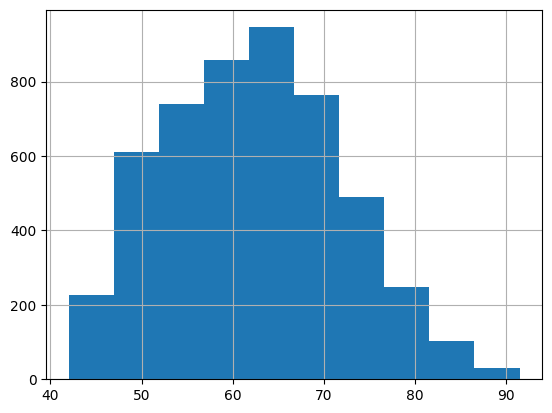

In [361]:
df["Age"].hist()

In [362]:
def boxplot(column):
  plt.figure(figsize=(8, 6)) # Set the figure size
  # Create a boxplot for the distribution of the 'Age' column
  sns.boxplot(y=df['Age'], palette='viridis')

  # --- 3. Customize the Plot (Optional) ---
  plt.title('Box Plot of Age Distribution (Seaborn)', fontsize=16)
  plt.ylabel('Age', fontsize=12)
  plt.xlabel('Distribution', fontsize=12) # Modified label for clarity

  # --- 4. Display the Plot ---
  plt.show()

<ipython-input-362-8fe4ef999f87>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Age'], palette='viridis')


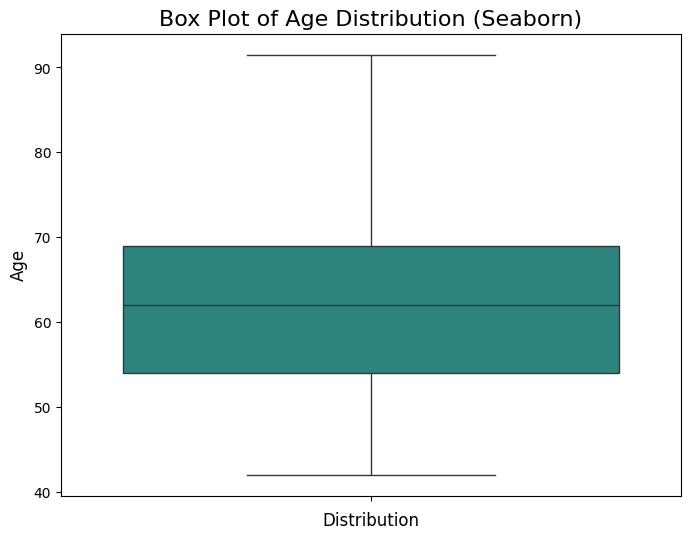

In [363]:
boxplot(df.Age)

**Numeric verilerin histogram ve boxplot grafiklerini birlikte yanyana göstermek amacıyla "histog_boxplot" fonksiyonu kullanıldı.**

In [364]:
def histog_boxplot(column):
  # Figür ve alt grafikleri oluşturalım
  # 1 satır, 2 sütunlu bir düzen oluştururuz
  # figsize, tüm figürün boyutunu (genişlik, yükseklik) piksel cinsinden ayarlar
  fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 satır, 2 sütun

  # --- Birinci Alt Grafik: Histogram ---
  # axes[0] ilk alt grafiği temsil eder (sol taraf)
  sns.histplot(column, kde=True, ax=axes[0], color='skyblue') # kde=True yoğunluk tahmini çizgisi ekler
  # Concatenate the column name and description into a single string for the title
  axes[0].set_title(f'{column.name} (Histogram)', fontsize=14)
  axes[0].set_xlabel('Değerler', fontsize=12)
  axes[0].set_ylabel('Frekans', fontsize=12)
  axes[0].grid(axis='y', linestyle='--', alpha=0.7)


  # --- İkinci Alt Grafik: Box Plot ---
  # axes[1] ikinci alt grafiği temsil eder (sağ taraf)
  sns.boxplot(y=column, ax=axes[1], color='lightcoral') # Sadece tek bir sütun olduğu için 'y' eksenine atarız
  # Concatenate the column name and description into a single string for the title
  axes[1].set_title(f'{column.name} (Box Plot)', fontsize=14)
  axes[1].set_ylabel('Değerler', fontsize=12)
  axes[1].grid(axis='y', linestyle='--', alpha=0.7)


  # Grafiklerin düzenini optimize edelim ve çakışmaları önleyelim
  plt.tight_layout()

  # Grafiği gösterelim
  plt.show()

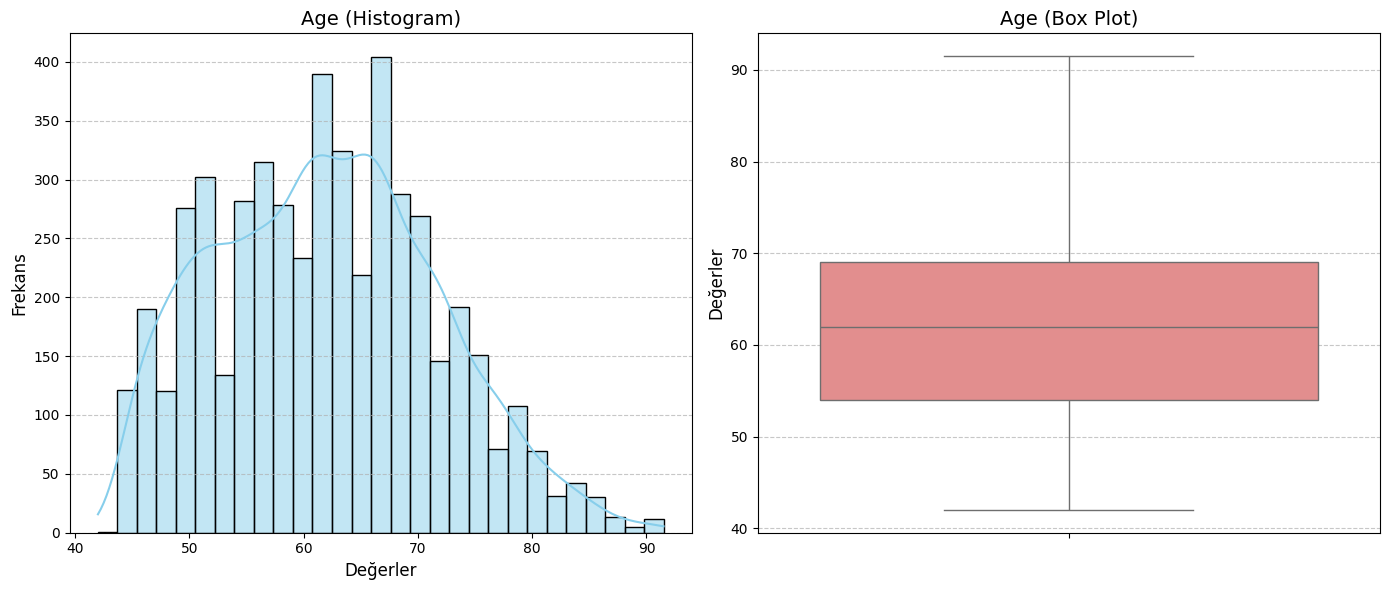

In [365]:
histog_boxplot(df["Age"])

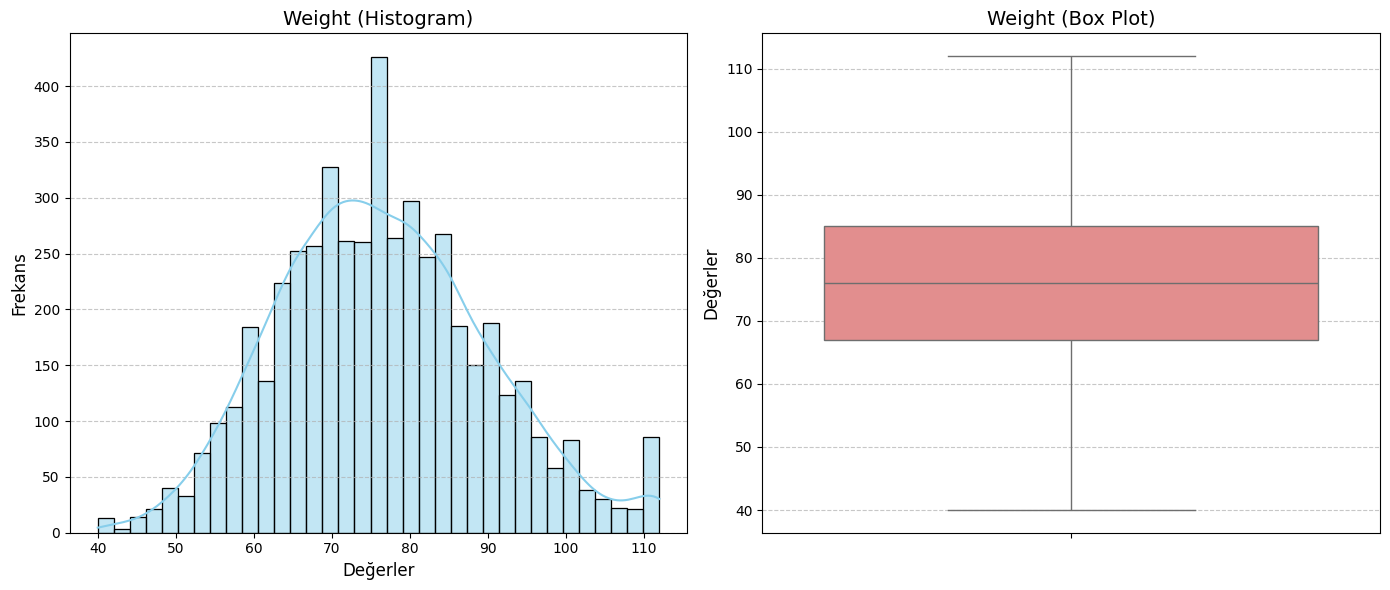

In [366]:
histog_boxplot(df["Weight"])

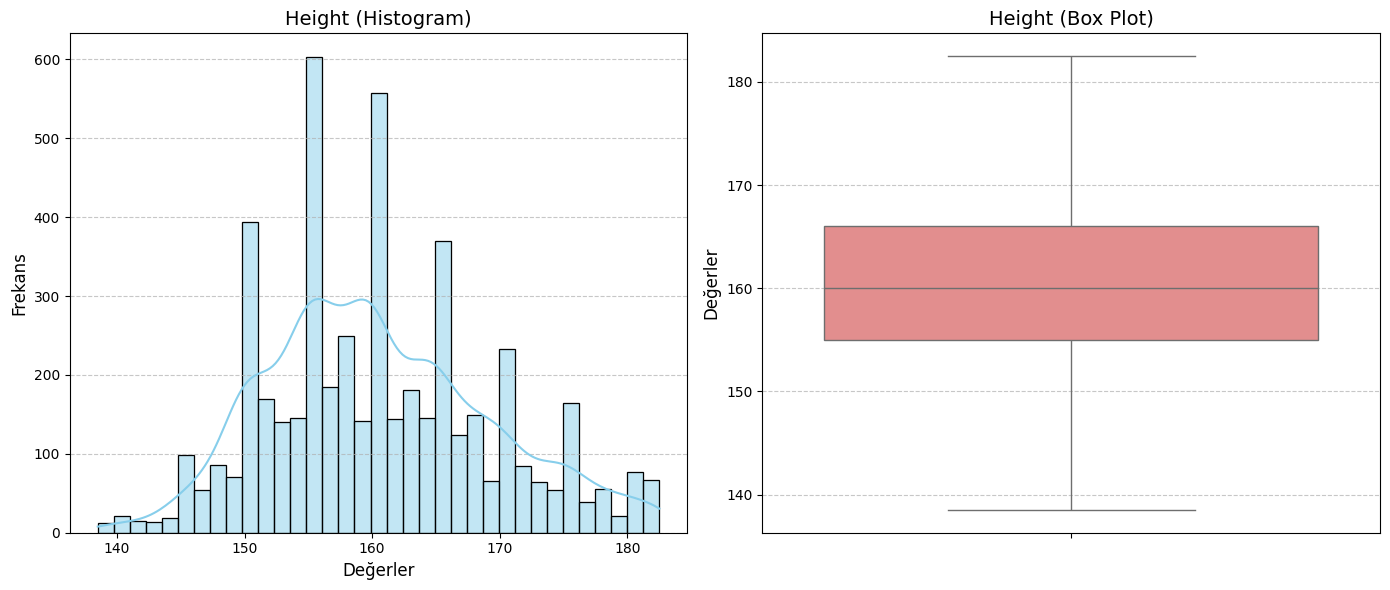

In [367]:
histog_boxplot(df["Height"])

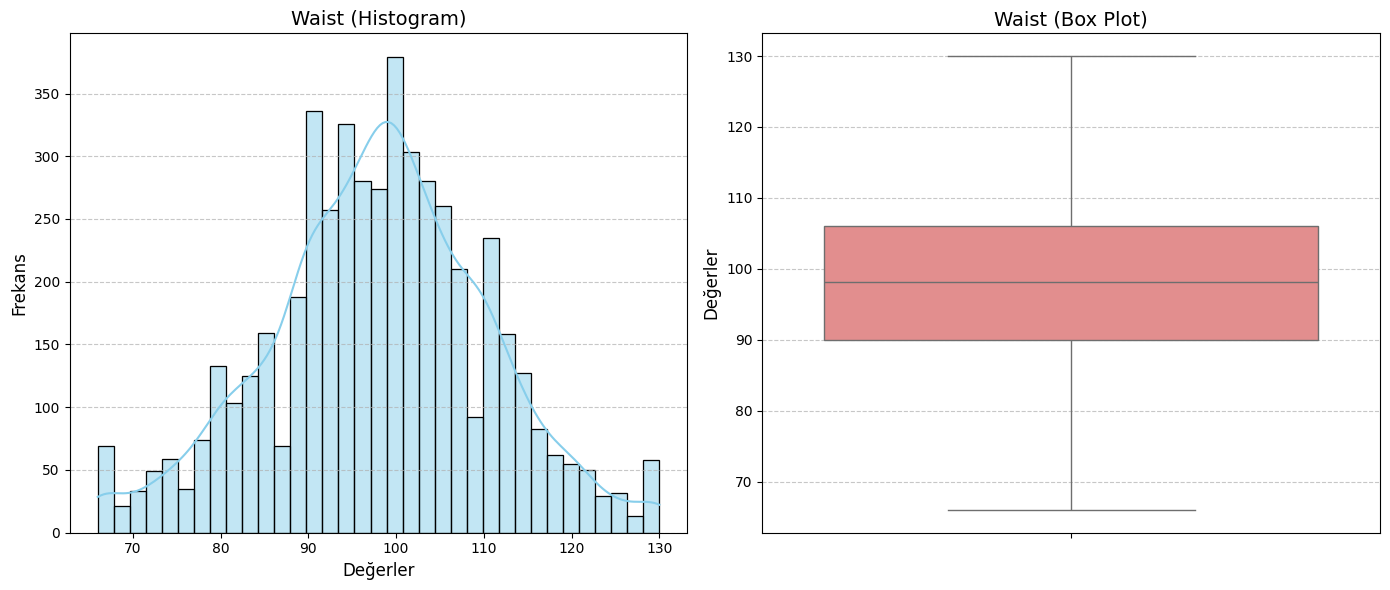

In [368]:
histog_boxplot(df.Waist)

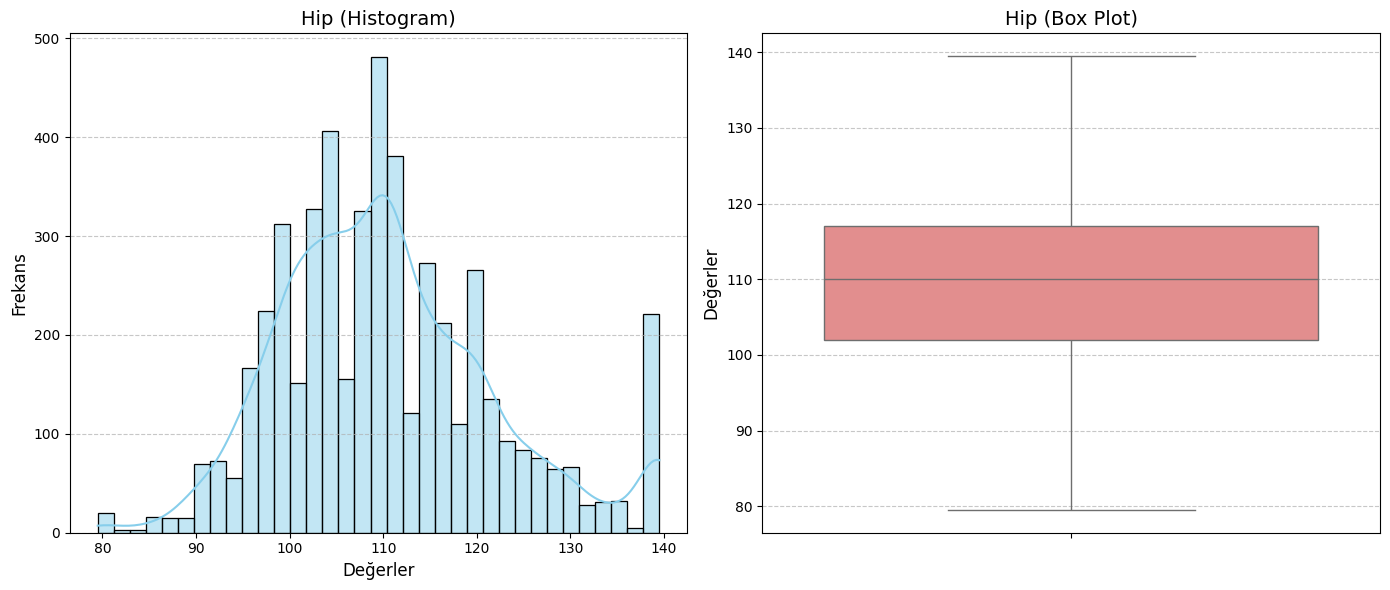

In [369]:
histog_boxplot(df.Hip)

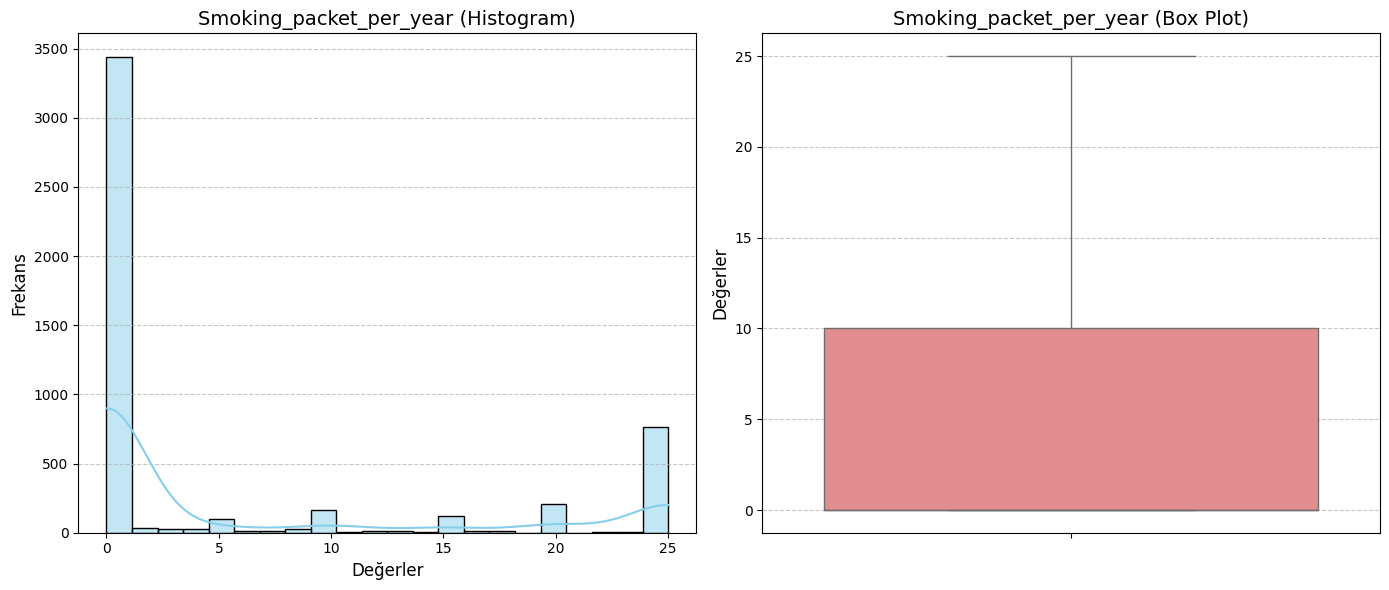

In [370]:
histog_boxplot(df.Smoking_packet_per_year)

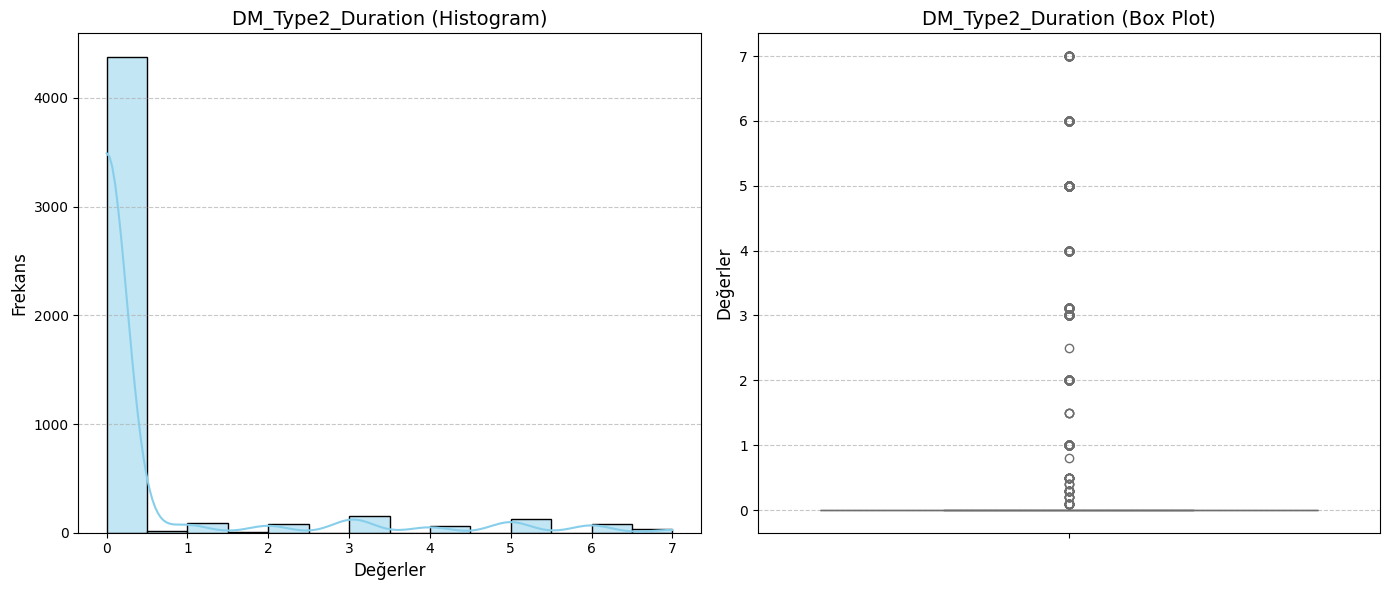

In [371]:
histog_boxplot(df.DM_Type2_Duration)

In [372]:
df.DM_Type2_Duration.describe()

count    5016.000000
mean        0.464094
std         1.370490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: DM_Type2_Duration, dtype: float64

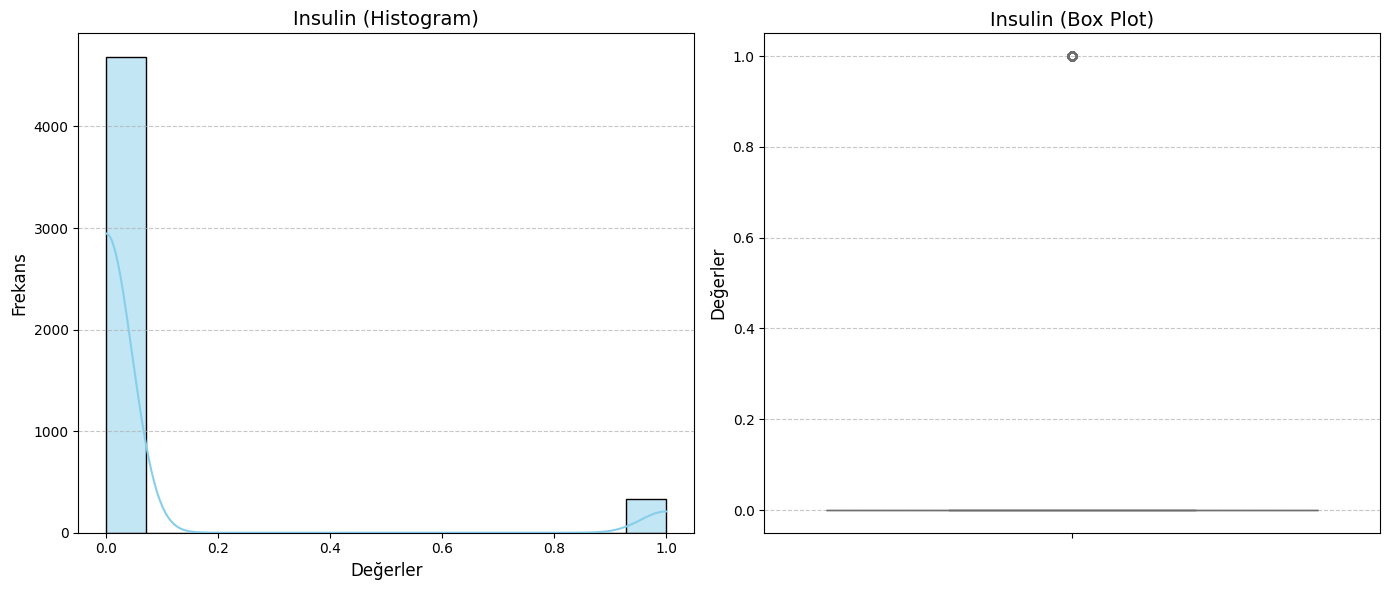

In [373]:
histog_boxplot(df.Insulin)

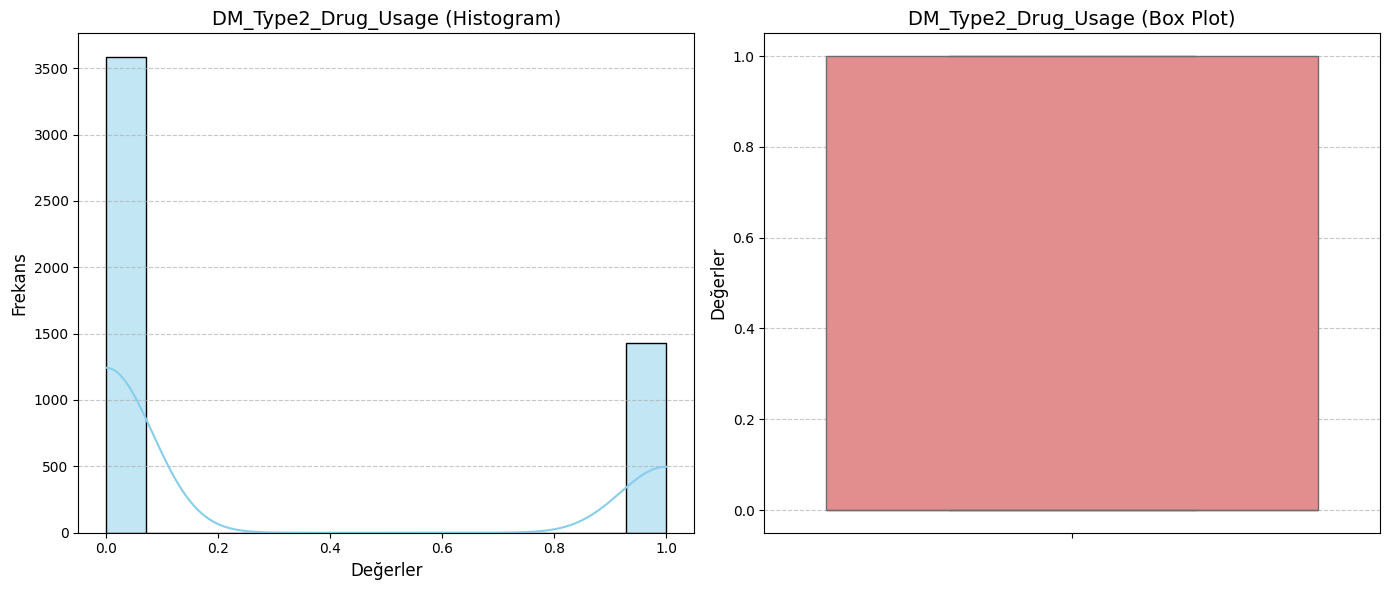

In [374]:
histog_boxplot(df.DM_Type2_Drug_Usage)

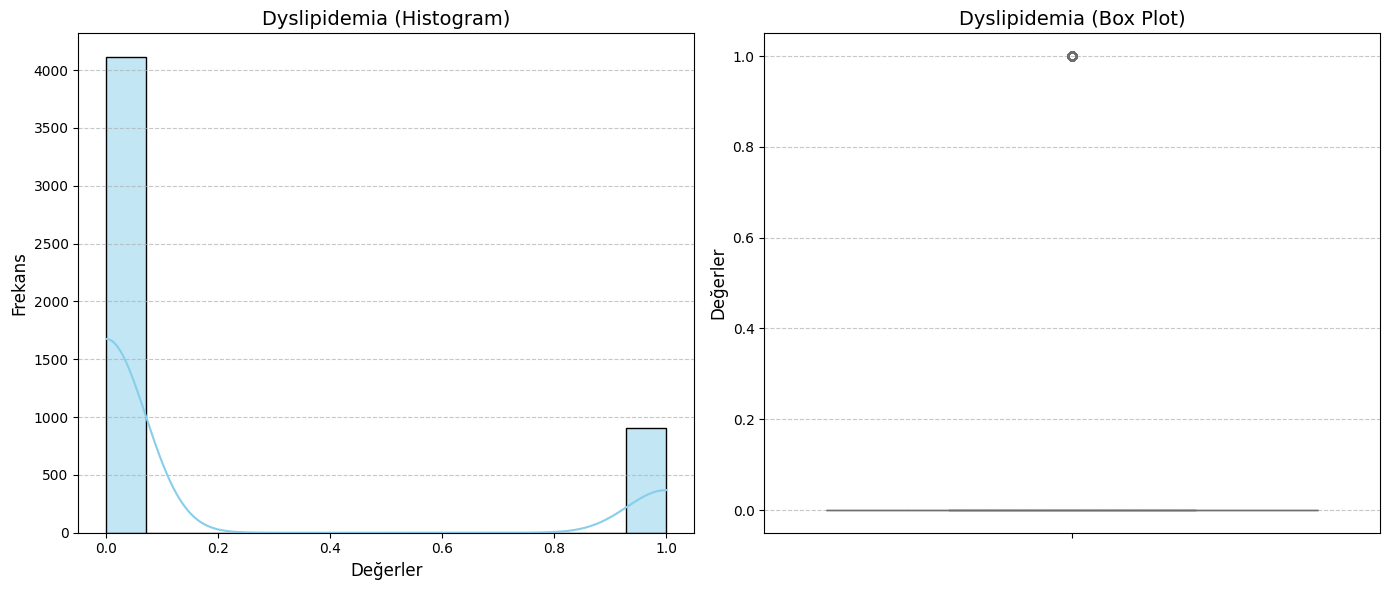

In [375]:
histog_boxplot(df.Dyslipidemia)

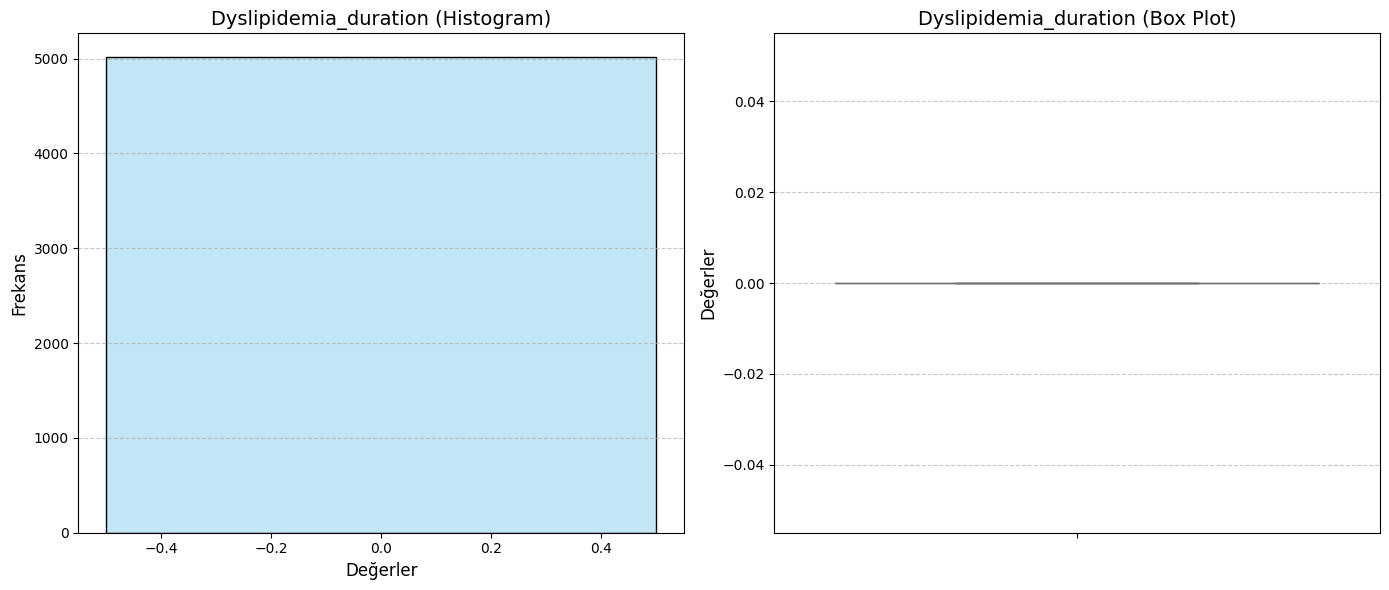

In [376]:
histog_boxplot(df.Dyslipidemia_duration)

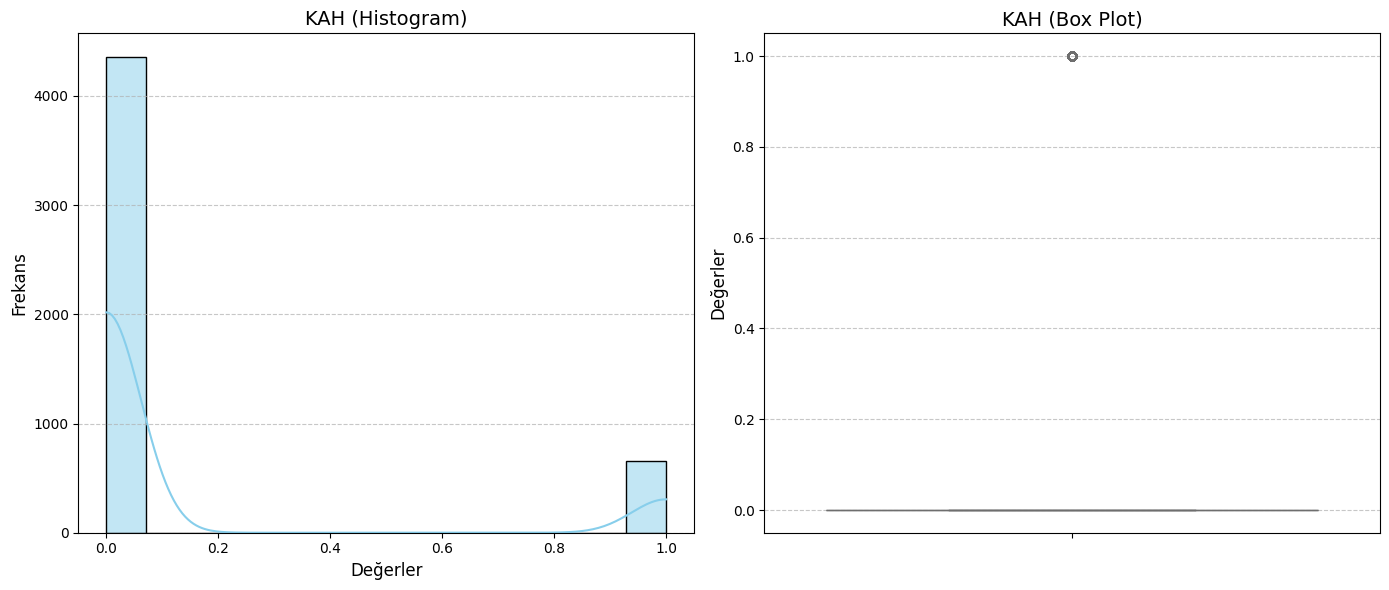

In [377]:
histog_boxplot(df.KAH)

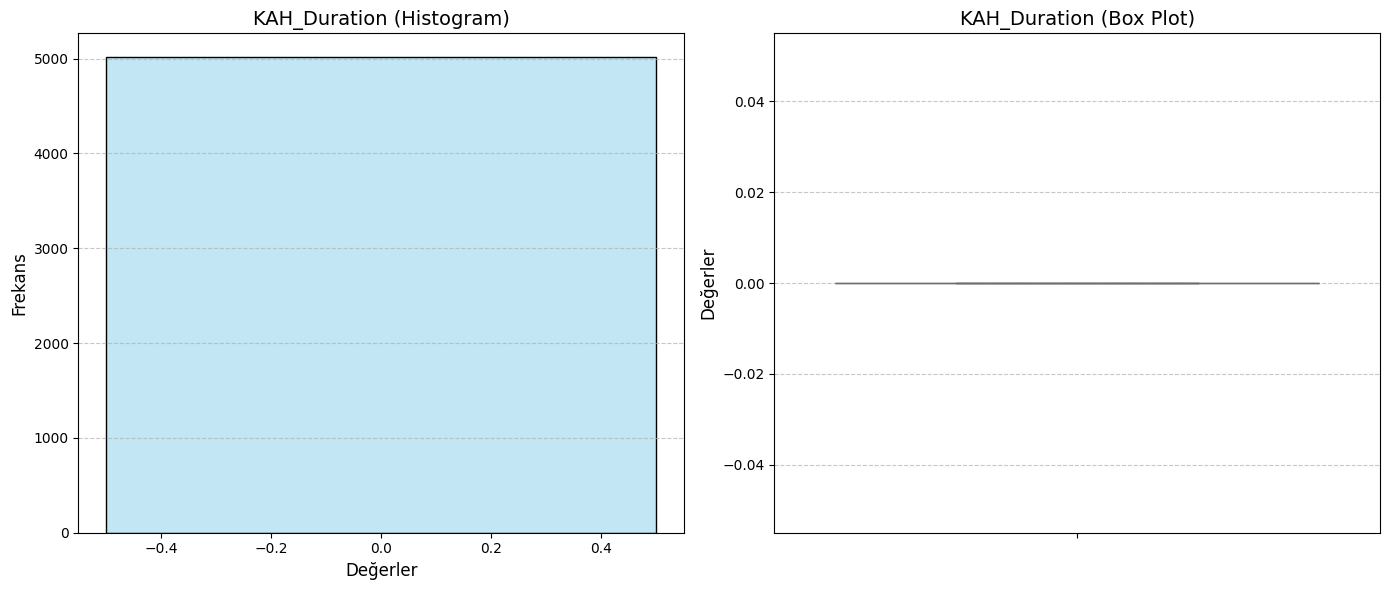

In [378]:
histog_boxplot(df.KAH_Duration)

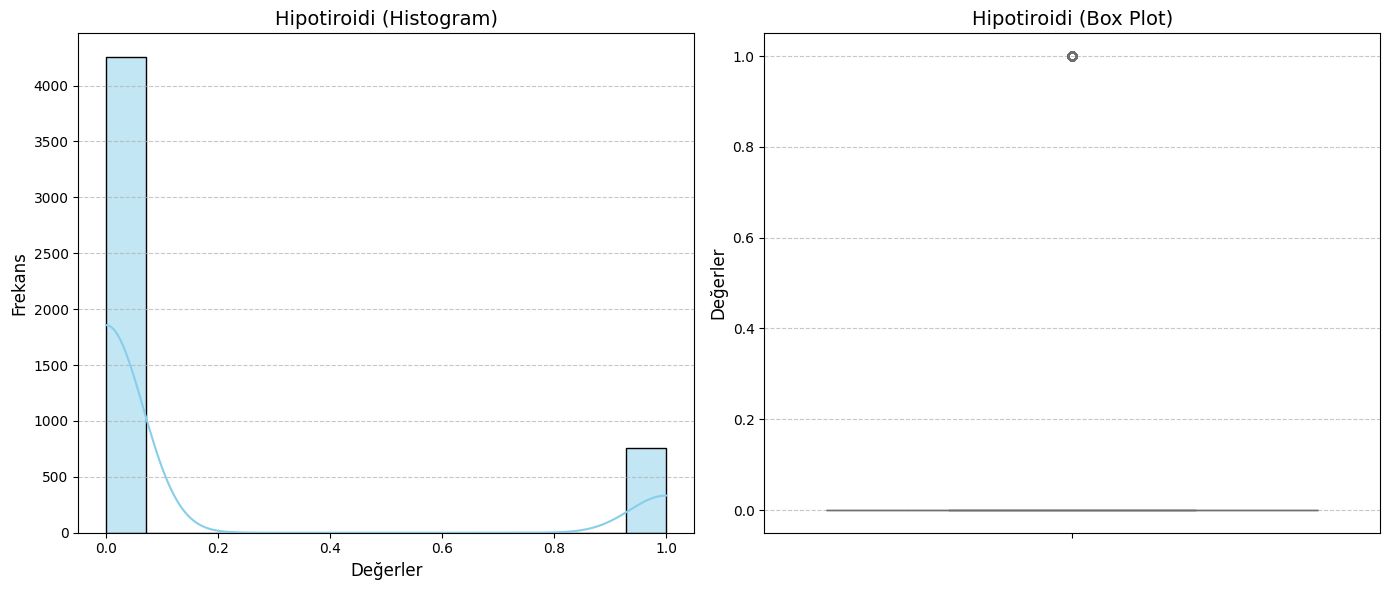

In [379]:
histog_boxplot(df.Hipotiroidi)

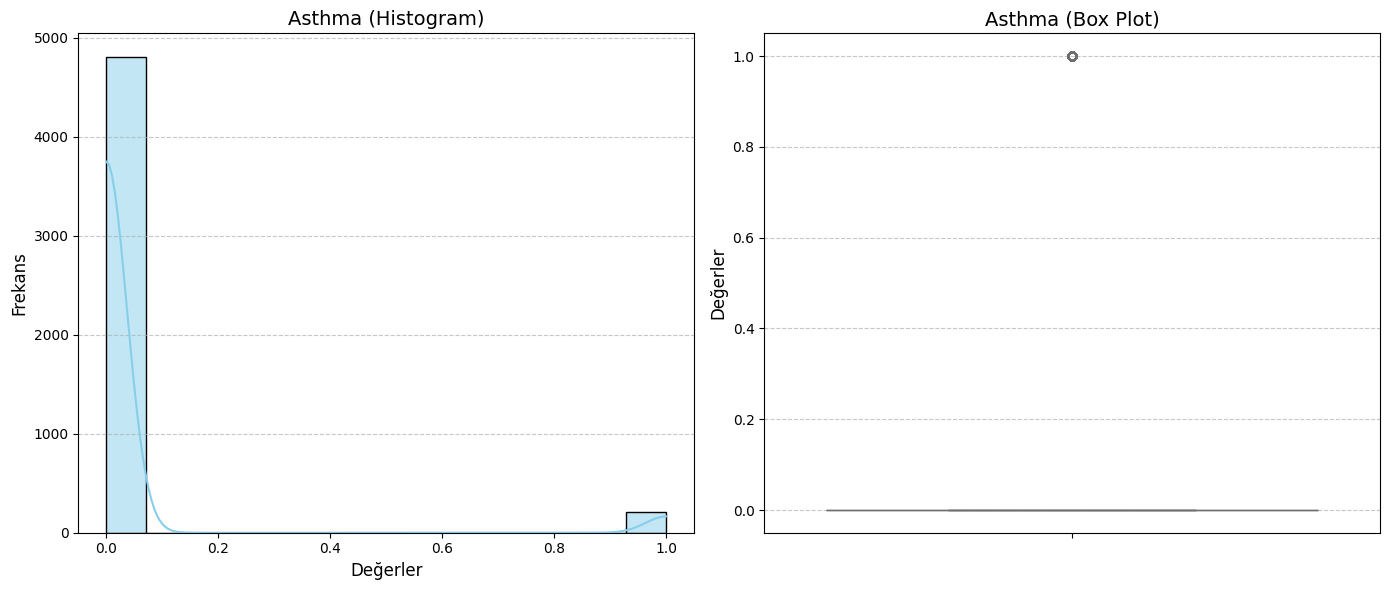

In [380]:
histog_boxplot(df.Asthma)

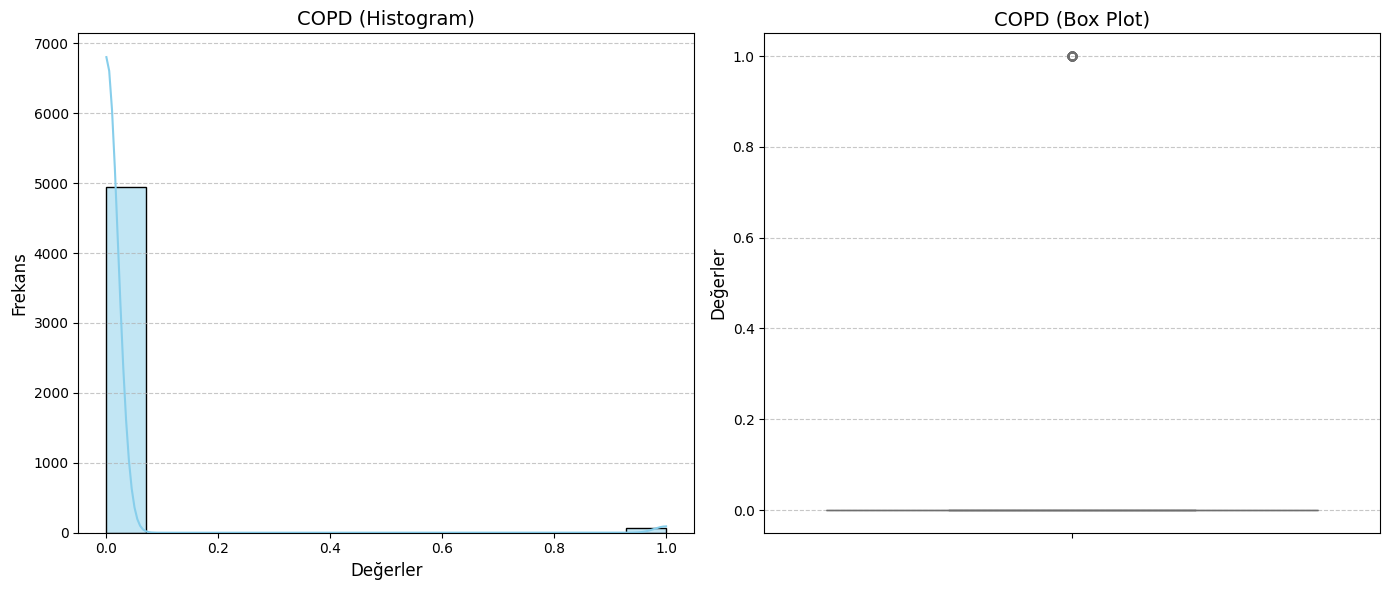

In [381]:
histog_boxplot(df.COPD)

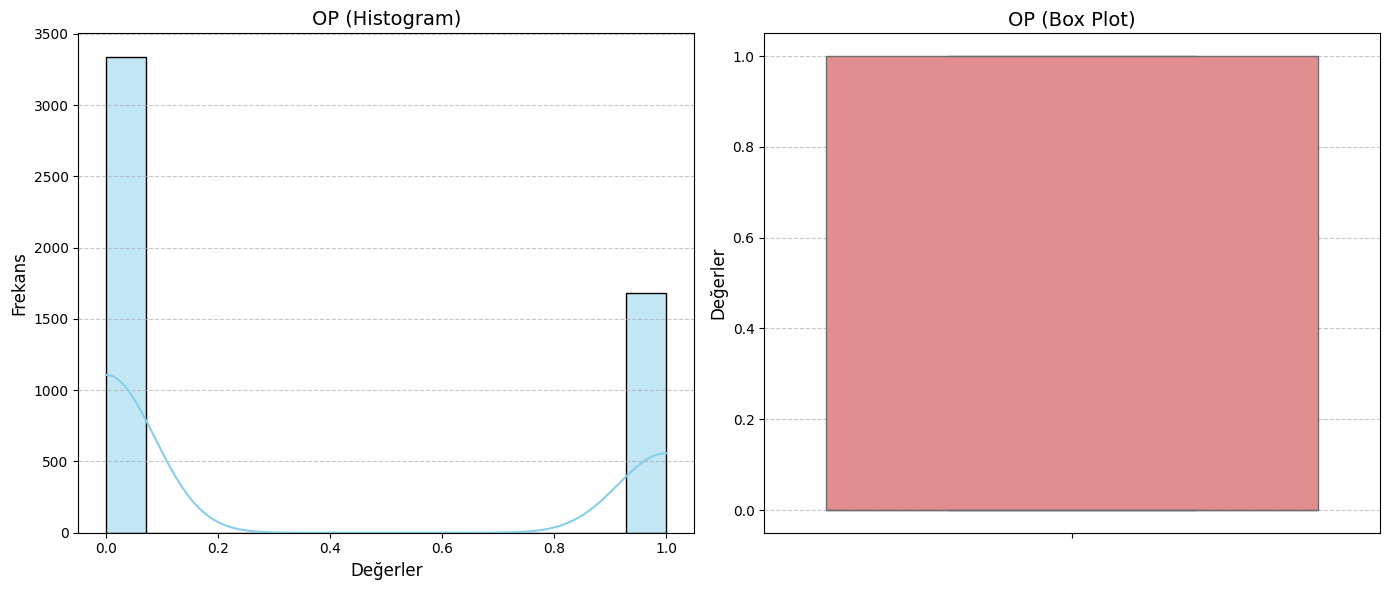

In [382]:
histog_boxplot(df.OP)

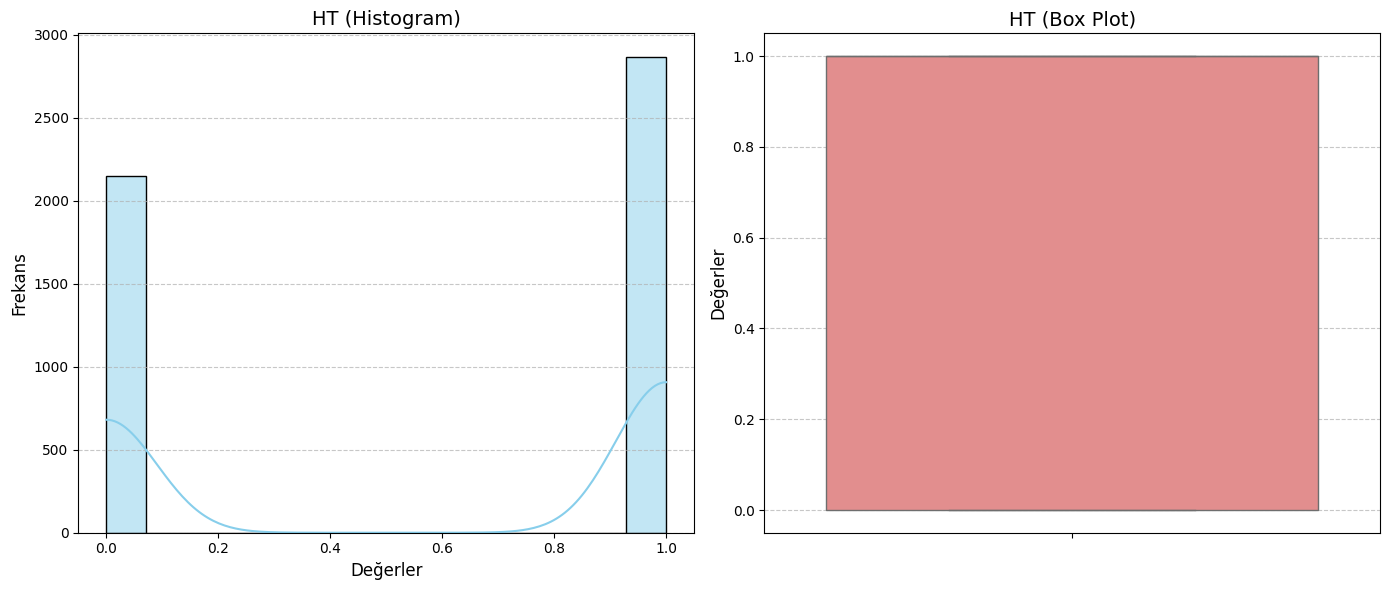

In [383]:
histog_boxplot(df.HT)

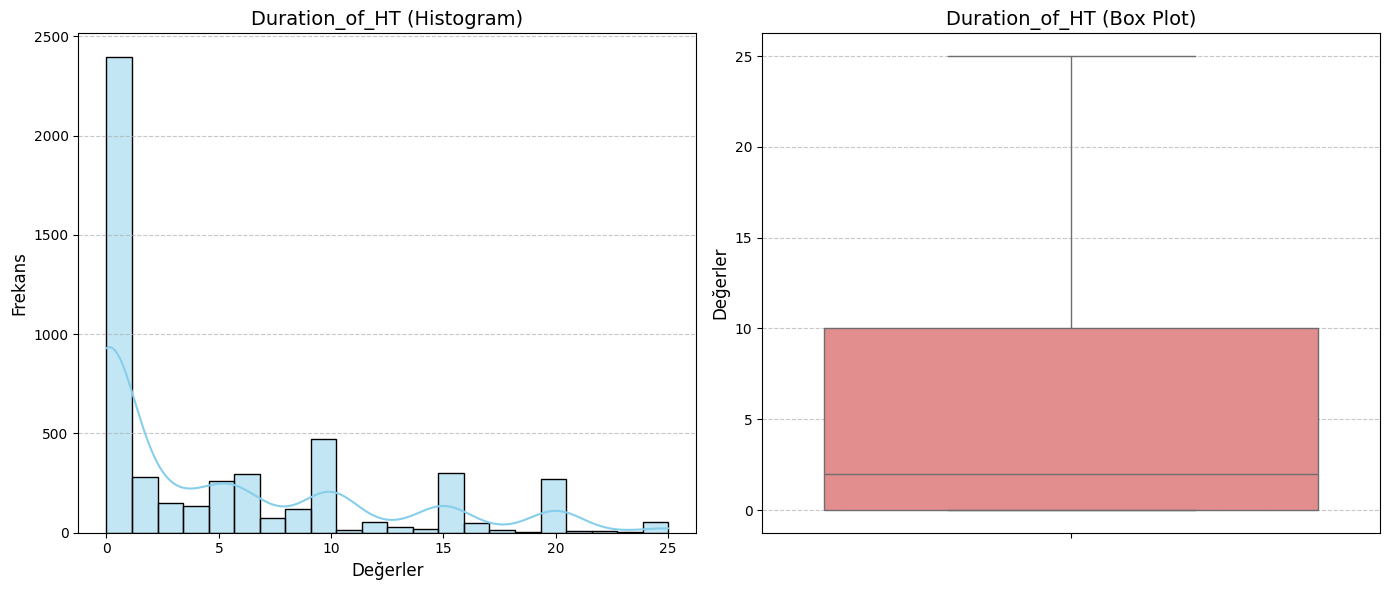

In [384]:
histog_boxplot(df.Duration_of_HT)

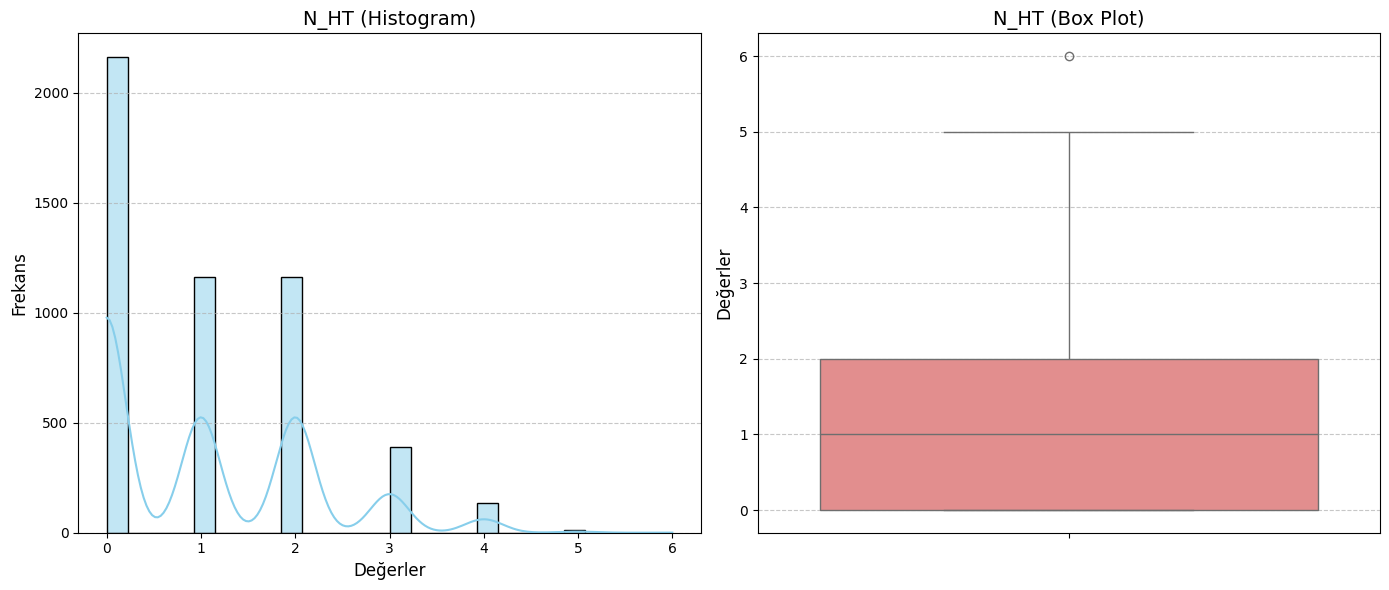

In [385]:
histog_boxplot(df.N_HT)

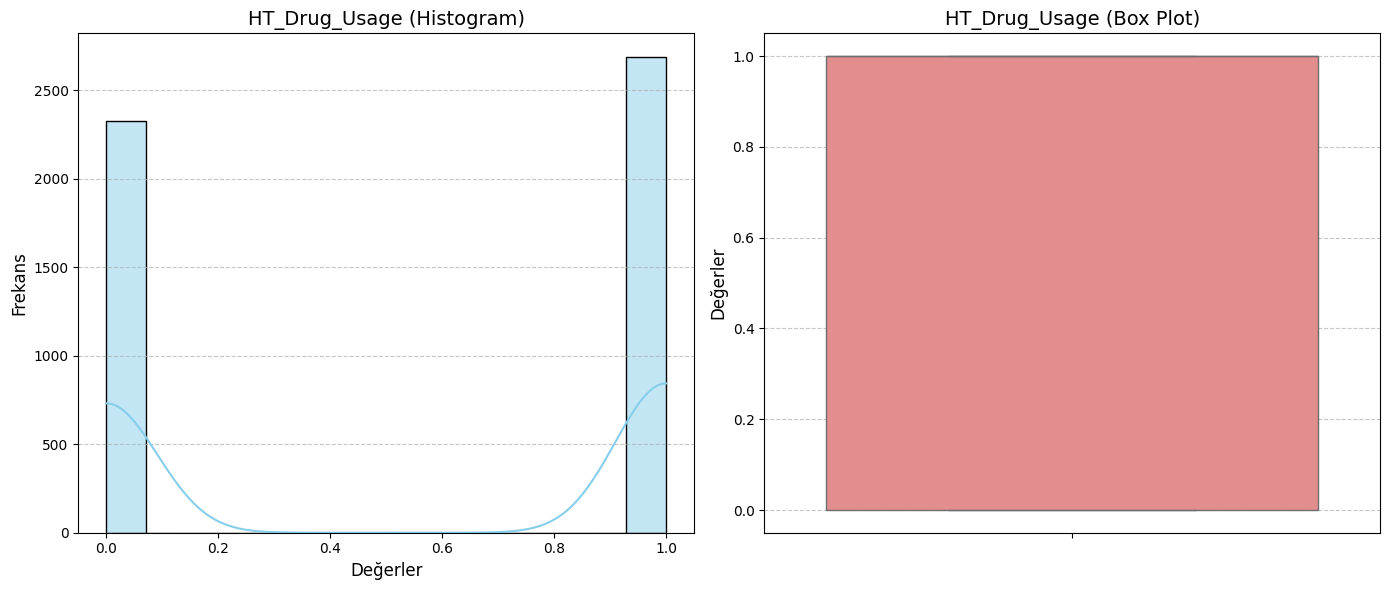

In [386]:
histog_boxplot(df.HT_Drug_Usage)

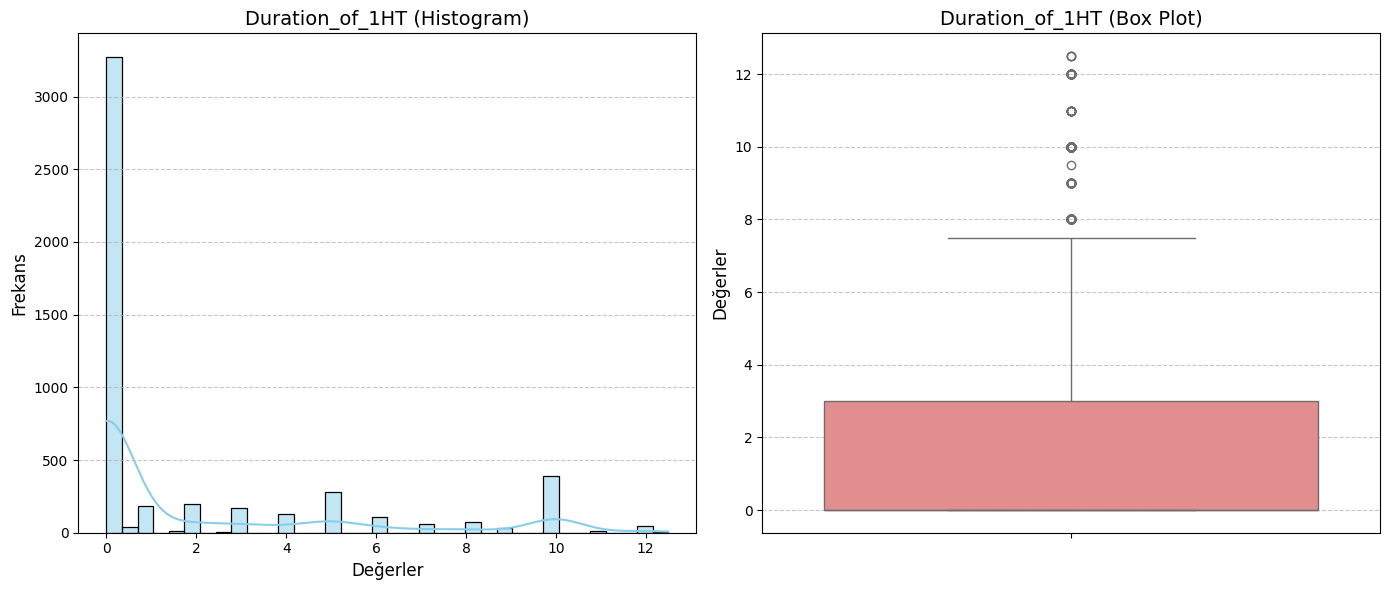

In [387]:
histog_boxplot(df.Duration_of_1HT)

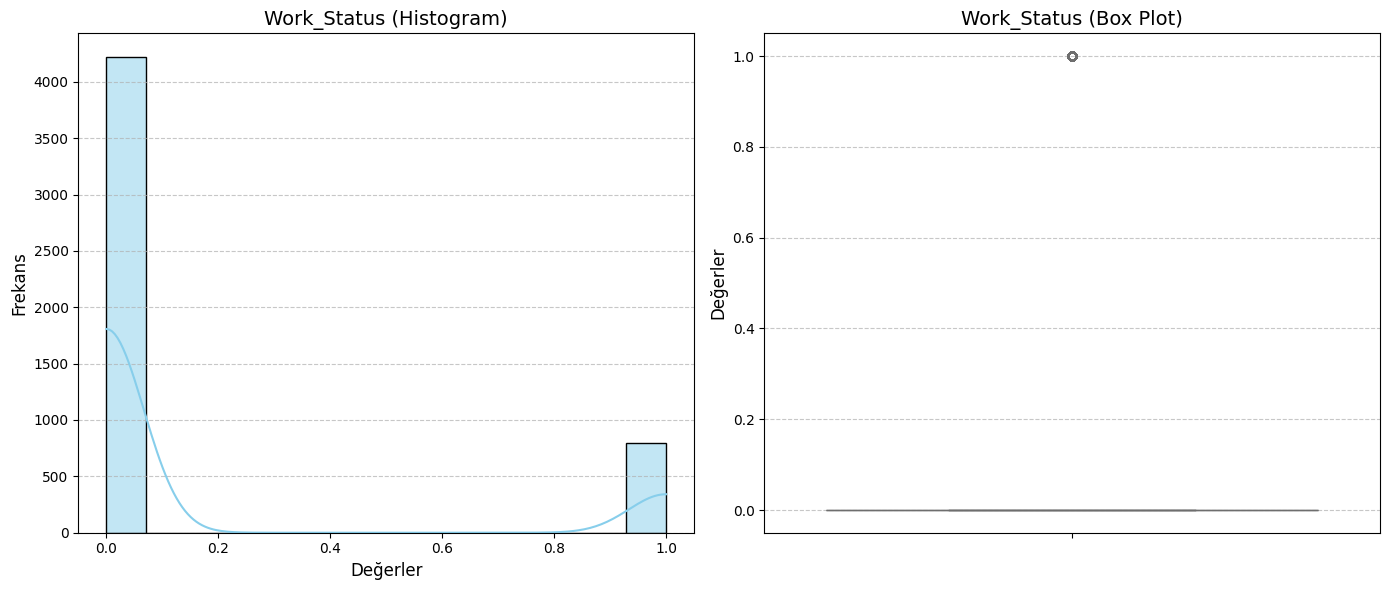

In [388]:
histog_boxplot(df.Work_Status)

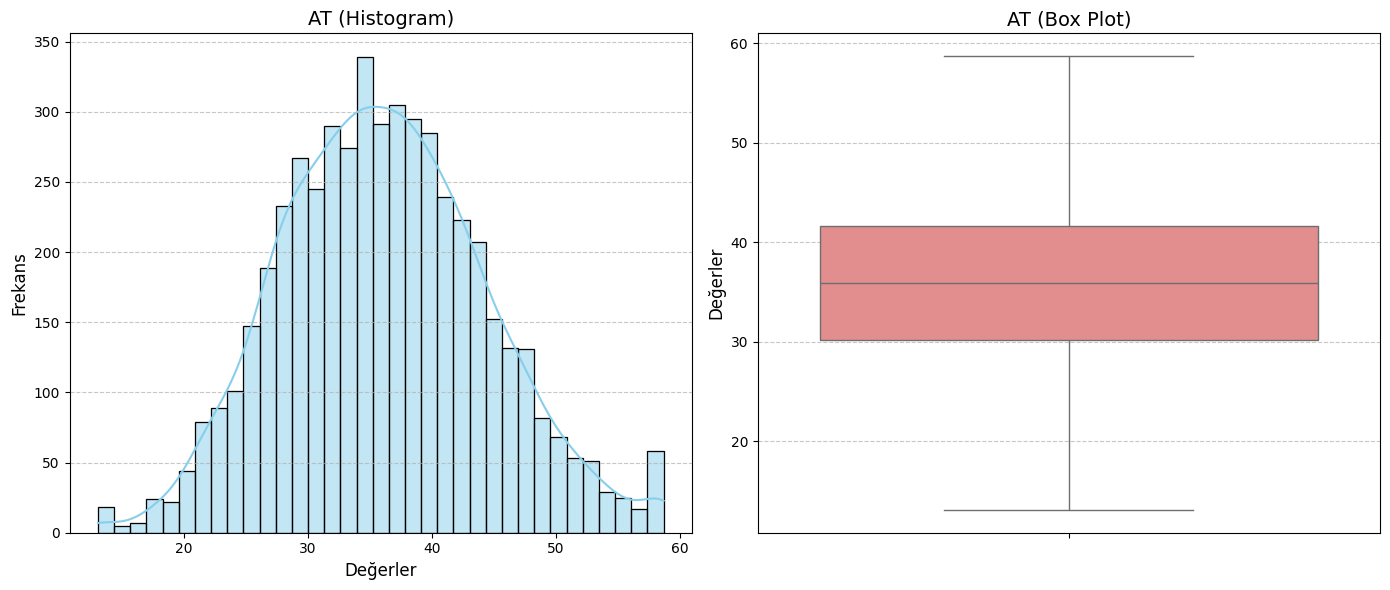

In [389]:
histog_boxplot(df.AT)

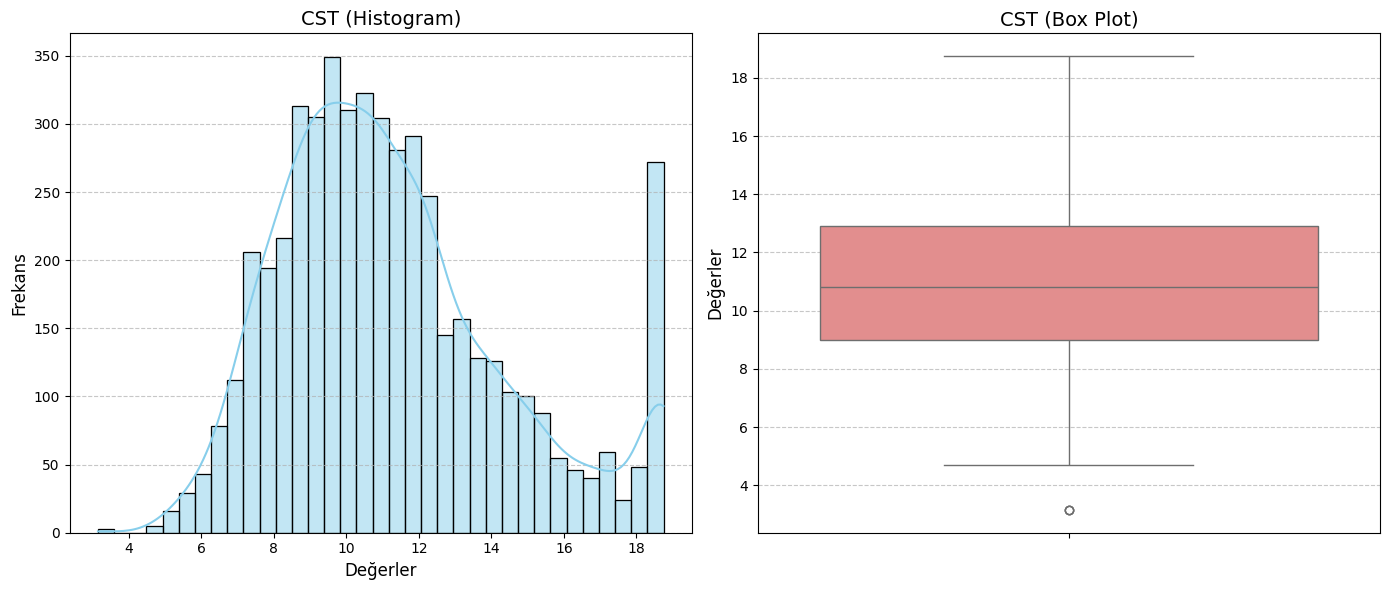

In [390]:
histog_boxplot(df.CST)

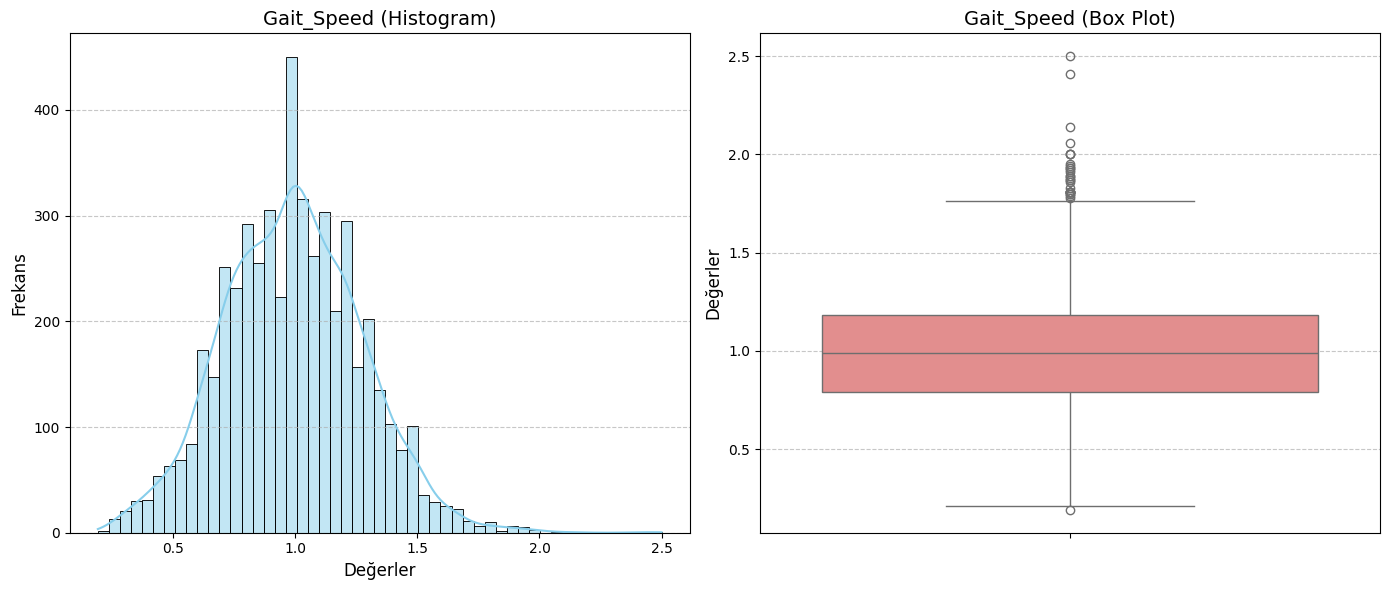

In [391]:
histog_boxplot(df.Gait_Speed)

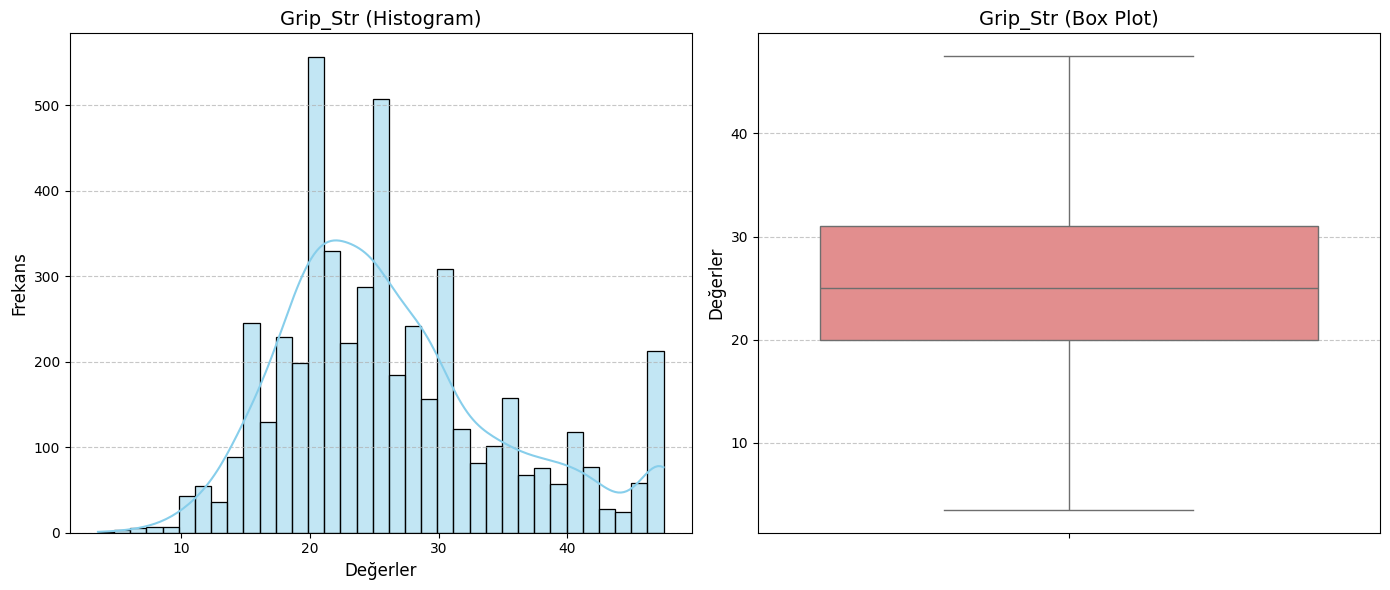

In [392]:
histog_boxplot(df.Grip_Str)

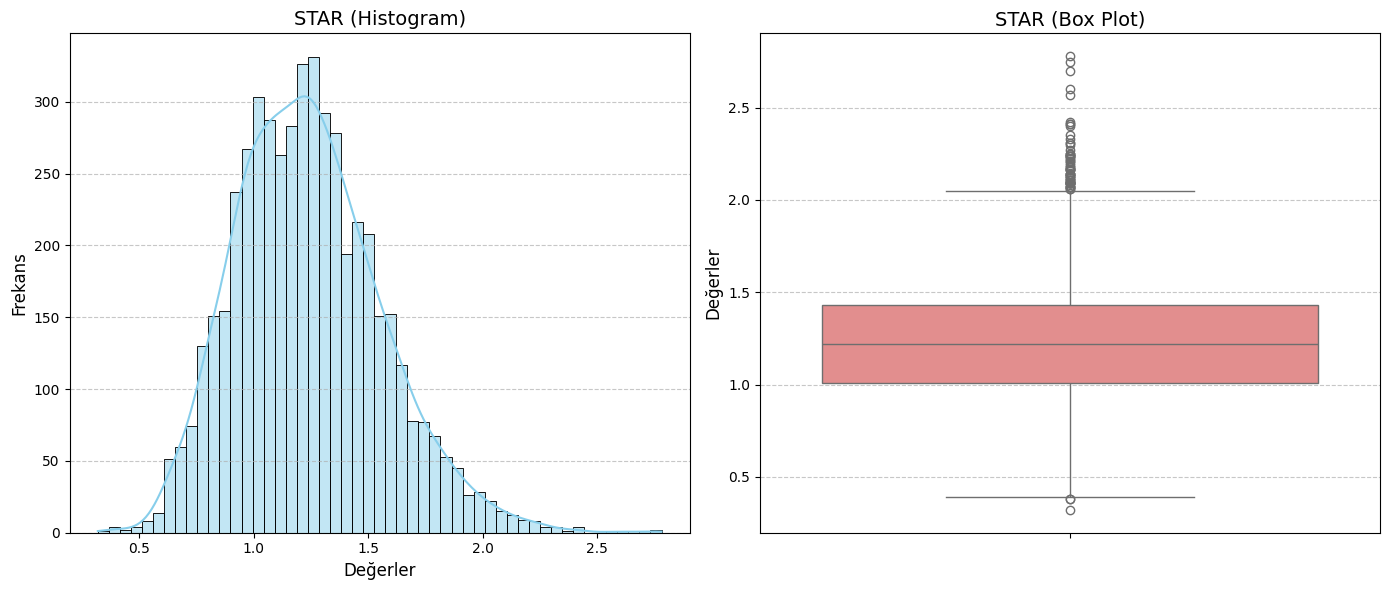

In [393]:
histog_boxplot(df.STAR)

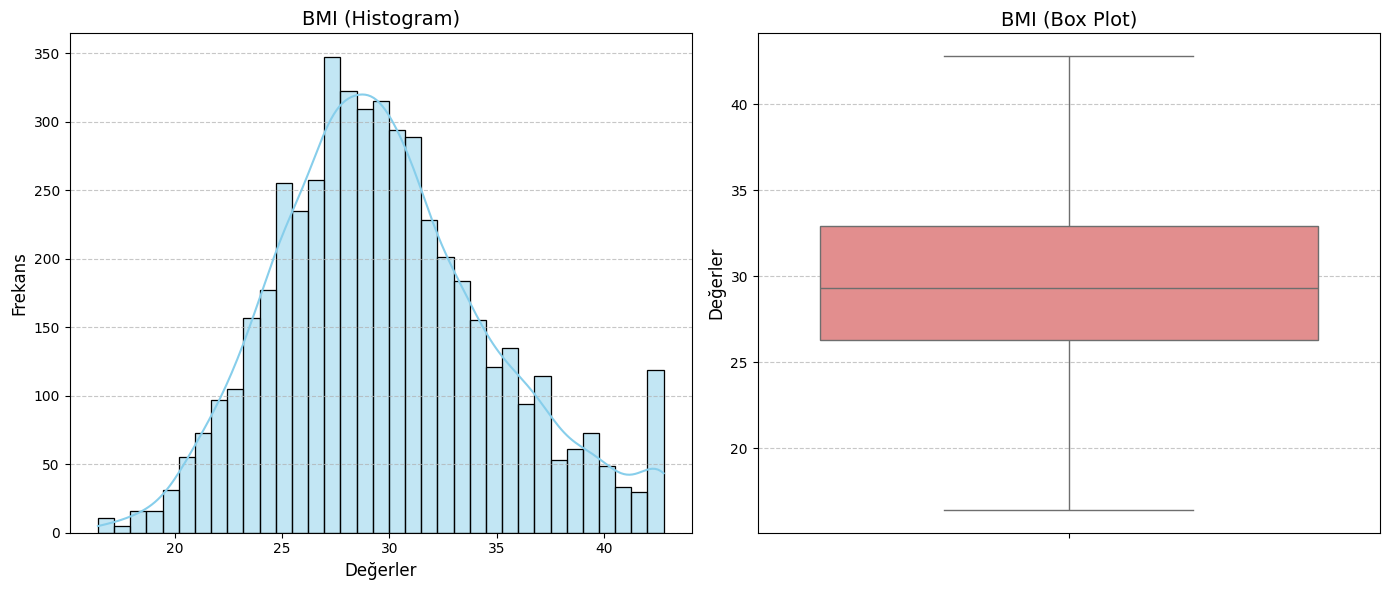

In [394]:
histog_boxplot(df.BMI)

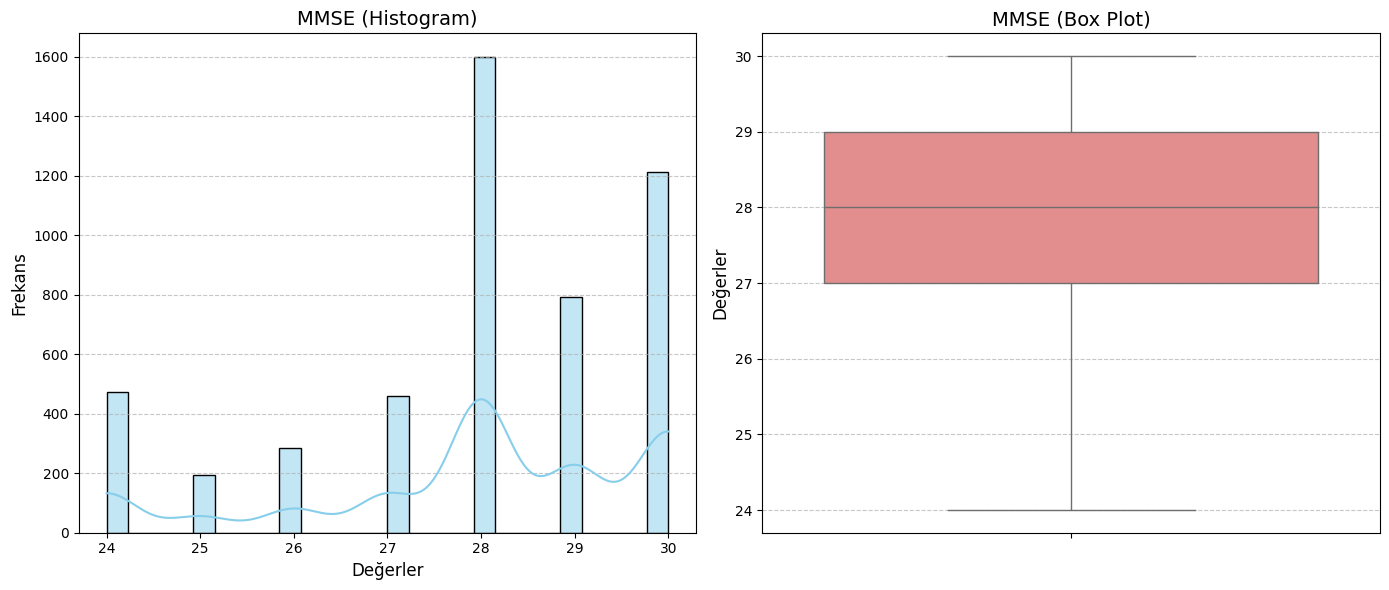

In [395]:
histog_boxplot(df.MMSE)

In [396]:
df.Sarcopenia.describe()

count    5016.000000
mean        0.203150
std         0.402383
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Sarcopenia, dtype: float64

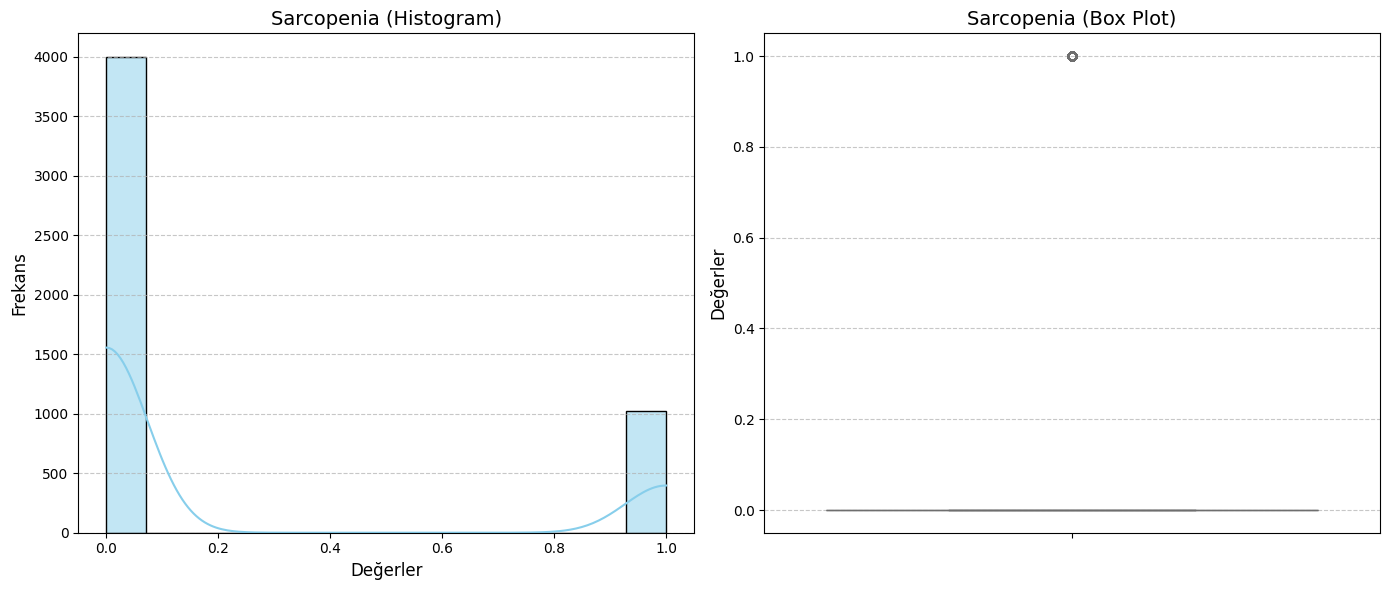

In [397]:
histog_boxplot(df.Sarcopenia)

**y ekseninde ölçek azaltmak için grafikte "histog_boxplot_2" fonksiyonu kullanıldı.**

In [398]:
def histog_boxplot_2(column):
    # Figür ve alt grafikleri oluşturalım
    # 1 satır, 2 sütunlu bir düzen oluştururuz
    # figsize, tüm figürün boyutunu (genişlik, yükseklik) piksel cinsinden ayarlar
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 satır, 2 sütun

    # --- Birinci Alt Grafik: Histogram ---
    # axes[0] ilk alt grafiği temsil eder (sol taraf)
    sns.histplot(column, kde=True, ax=axes[0], color='skyblue') # kde=True yoğunluk tahmini çizgisi ekler
    # Concatenate the column name and description into a single string for the title
    axes[0].set_title(f'{column.name} (Histogram)', fontsize=14)
    axes[0].set_xlabel('Değerler', fontsize=12)
    axes[0].set_ylabel('Frekans', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)


    # --- İkinci Alt Grafik: Box Plot ---
    # axes[1] ikinci alt grafiği temsil eder (sağ taraf)
    sns.boxplot(y=column, ax=axes[1], color='lightcoral') # Sadece tek bir sütun olduğu için 'y' eksenine atarız
    # Concatenate the column name and description into a single string for the title
    axes[1].set_title(f'{column.name} (Box Plot)', fontsize=14)
    axes[1].set_ylabel('Değerler', fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)


    # Grafiklerin düzenini optimize edelim ve çakışmaları önleyelim
    plt.tight_layout()

    # Return the figure and axes objects
    return fig, axes

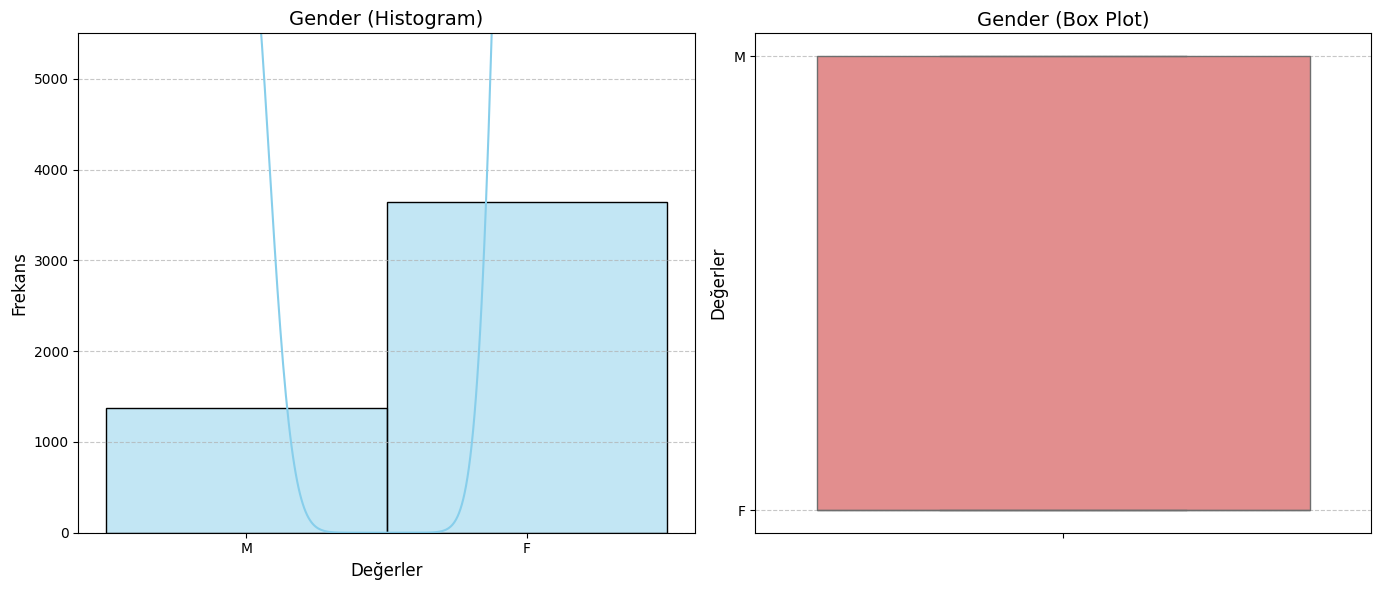

In [399]:
fig, axes = histog_boxplot_2(df.Gender)
axes[0].set_ylim(0, 5500)
  # Grafiği gösterelim
plt.show()

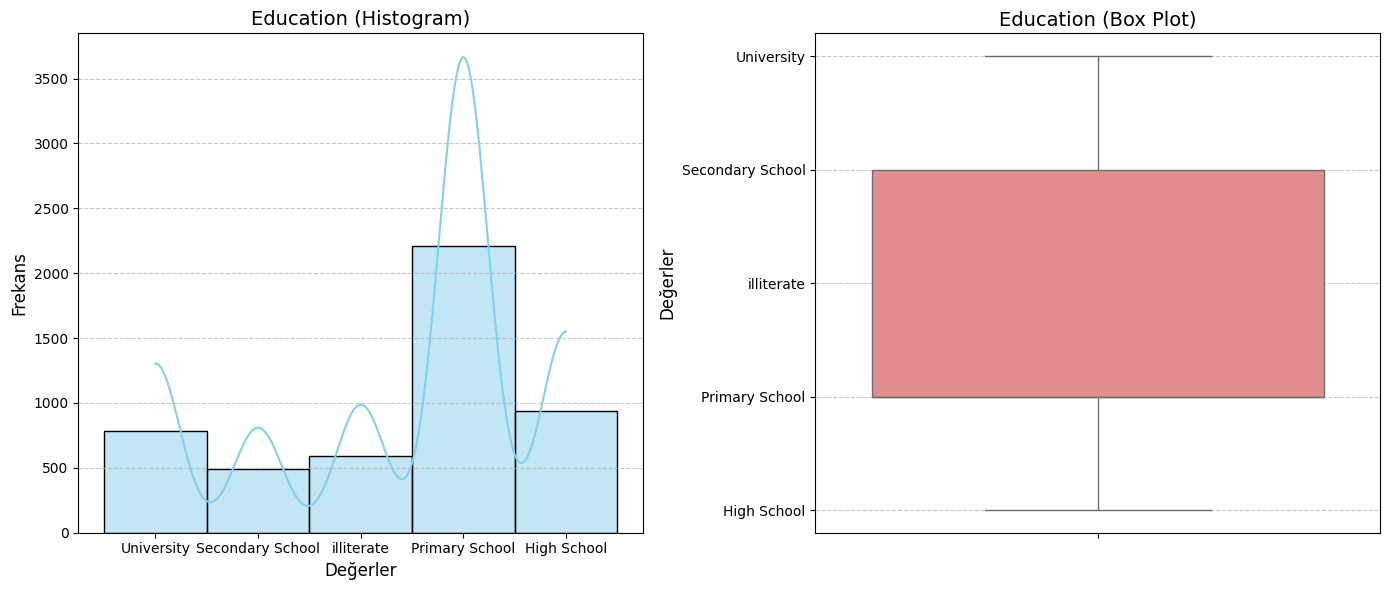

In [400]:
histog_boxplot(df.Education)

**Kategorik değerleri y ekseninde göstermek amacıyla "histog_boxplot_3" fonksiyonu kullanıldı.**

In [401]:
def histog_boxplot_3(column):
  # Figür ve alt grafikleri oluşturalım
    # 1 satır, 2 sütunlu bir düzen oluştururuz
    # figsize, tüm figürün boyutunu (genişlik, yükseklik) piksel cinsinden ayarlar
    fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # Yatay grafikler için biraz daha geniş bir figür

    # --- Birinci Alt Grafik: Yatay Histogram ---
    # axes[0] ilk alt grafiği temsil eder (sol taraf)
    # x yerine 'y' parametresini kullanarak histogramı yatay çizeriz.
    sns.histplot(y=column, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{column.name} (Histogram - Yatay)', fontsize=14)
    axes[0].set_xlabel('Frekans', fontsize=12) # Frekans şimdi X ekseninde
    axes[0].set_ylabel(column.name, fontsize=12) # Sütun adı şimdi Y ekseninde
    axes[0].grid(axis='x', linestyle='--', alpha=0.7) # Yatay histogramda X eksenine ızgara

    # --- İkinci Alt Grafik: Box Plot ---
    # axes[1] ikinci alt grafiği temsil eder (sağ taraf)
    sns.boxplot(x=column, ax=axes[1], color='lightcoral', orient='h') # orient='h' yatay çizim için
    axes[1].set_title(f'{column.name} (Box Plot - Yatay)', fontsize=14)
    axes[1].set_xlabel(column.name, fontsize=12) # Sütun adı şimdi X ekseninde
    axes[1].set_ylabel('Değerler (Y ekseni boş)', fontsize=12) # Y ekseni boş kalacak veya sabit bir değer gösterecek
    axes[1].grid(axis='x', linestyle='--', alpha=0.7) # Yatay box plot'ta X eksenine ızgara


    # Grafiklerin düzenini optimize edelim ve çakışmaları önleyelim
    plt.tight_layout()

    # Grafiği gösterelim
    plt.show()

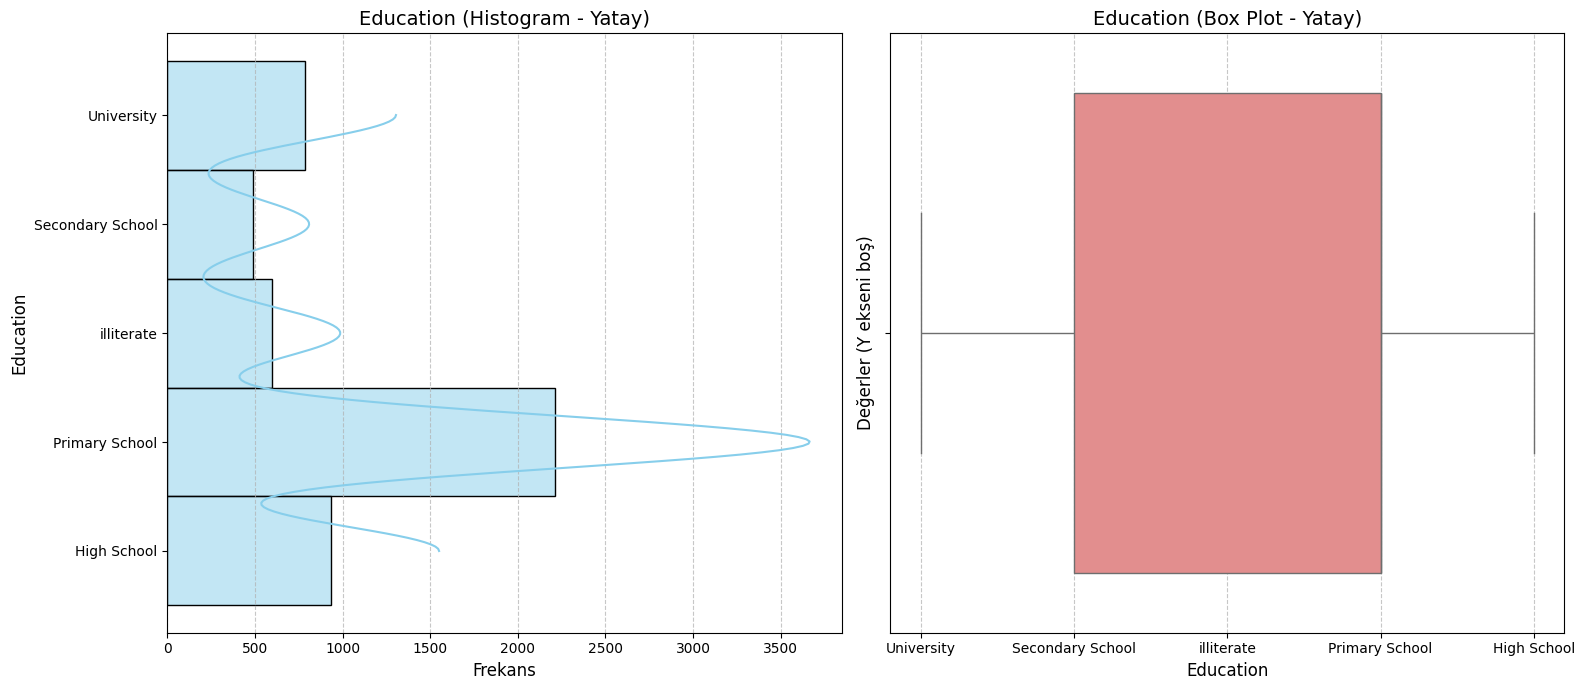

In [402]:
histog_boxplot_3(df.Education)

In [403]:
df["Exercise_Status"] = (df.Exercise != 0).astype(int).astype(str)

In [404]:
df.Exercise_Status.value_counts()

Exercise_Status
0    2928
1    2088
Name: count, dtype: int64

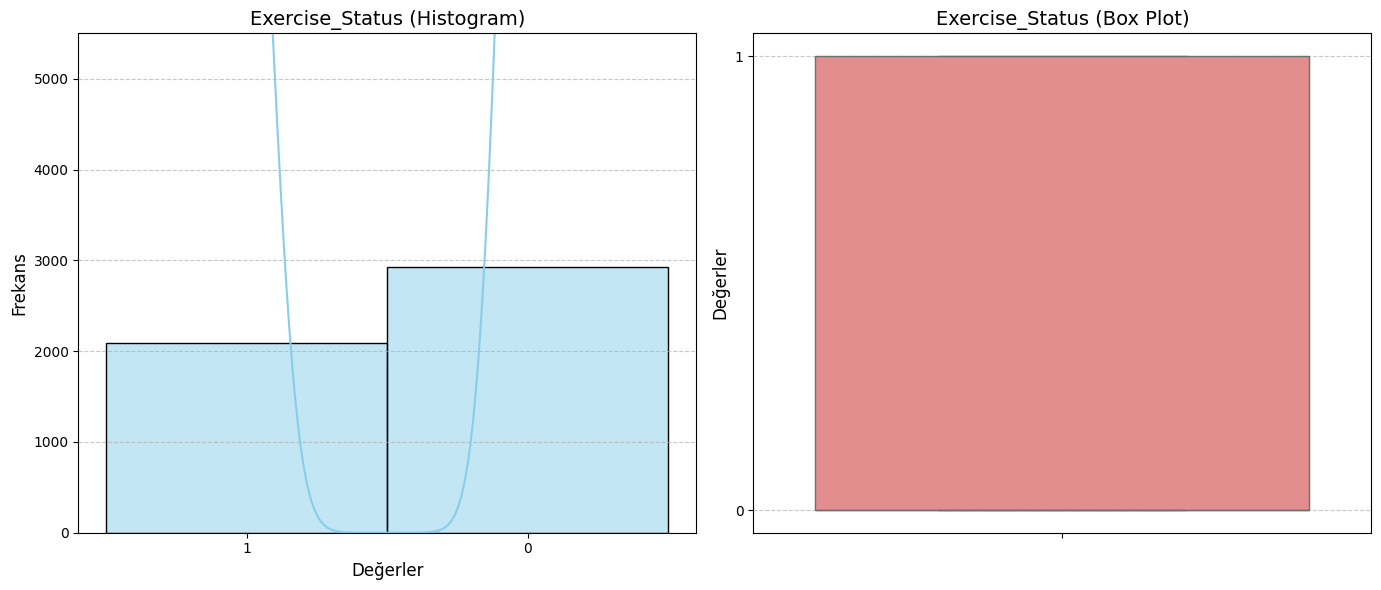

In [405]:
fig, axes = histog_boxplot_2(df.Exercise_Status)
axes[0].set_ylim(0, 5500)
  # Grafiği gösterelim
plt.show()

In [406]:

new_column_4 = df.pop("Exercise_Status")

In [407]:
df.insert(35, "Exercise_Status", new_column_4)

In [408]:
df.columns

Index(['Name', 'Order', 'Gender', 'Age', 'Weight', 'Height', 'Waist', 'Hip',
       'Smoking', 'Smoking_packet_per_year', 'Alcohol', 'DM_Type2',
       'DM_Type2_Duration', 'Insulin', 'DM_Type2_Drug', 'DM_Type2_Drug_Usage',
       'Dyslipidemia', 'Dyslipidemia_duration', 'KAH', 'KAH_Duration',
       'Hipotiroidi', 'Asthma', 'COPD', 'OP', 'HT', 'Duration_of_HT', 'N_HT',
       'HT_drugs', 'HT_Drug_Usage', 'Duration_of_1HT', 'Education', 'Job',
       'Status', 'Work_Status', 'Exercise', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'BMI', 'MMSE', 'Sarcopenia'],
      dtype='object')

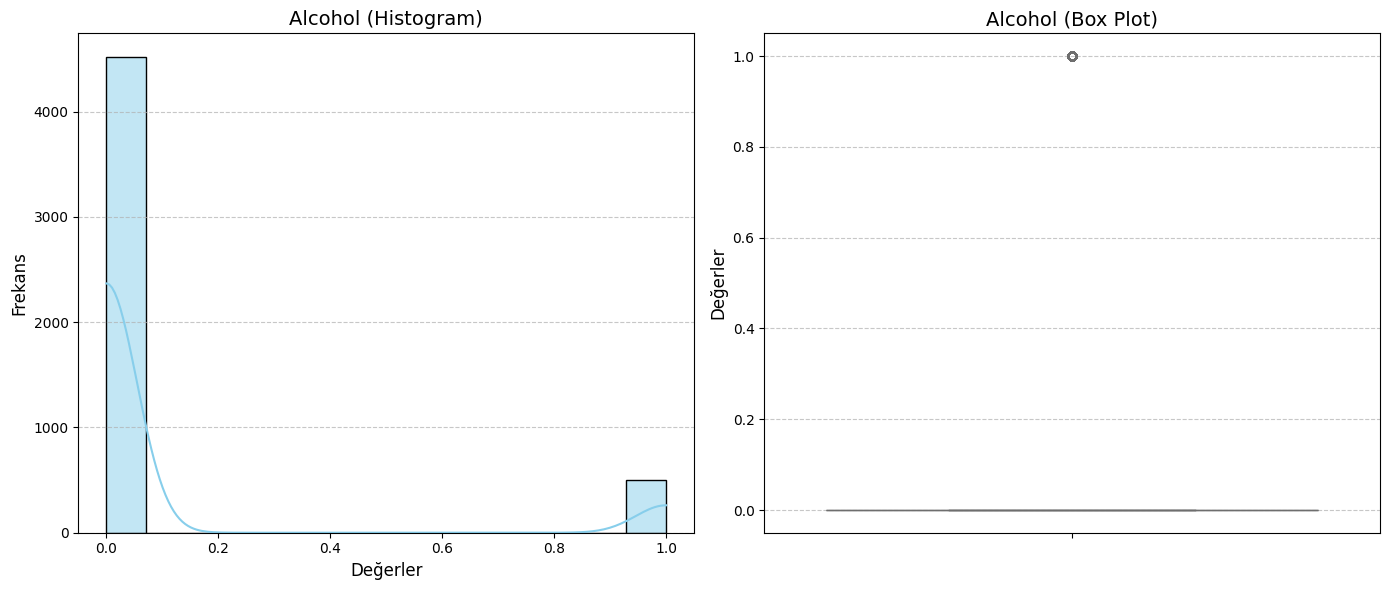

In [409]:
histog_boxplot(df.Alcohol)

# **Bi-variate Analysis**

**Correlation Matrix of Numerical Values**

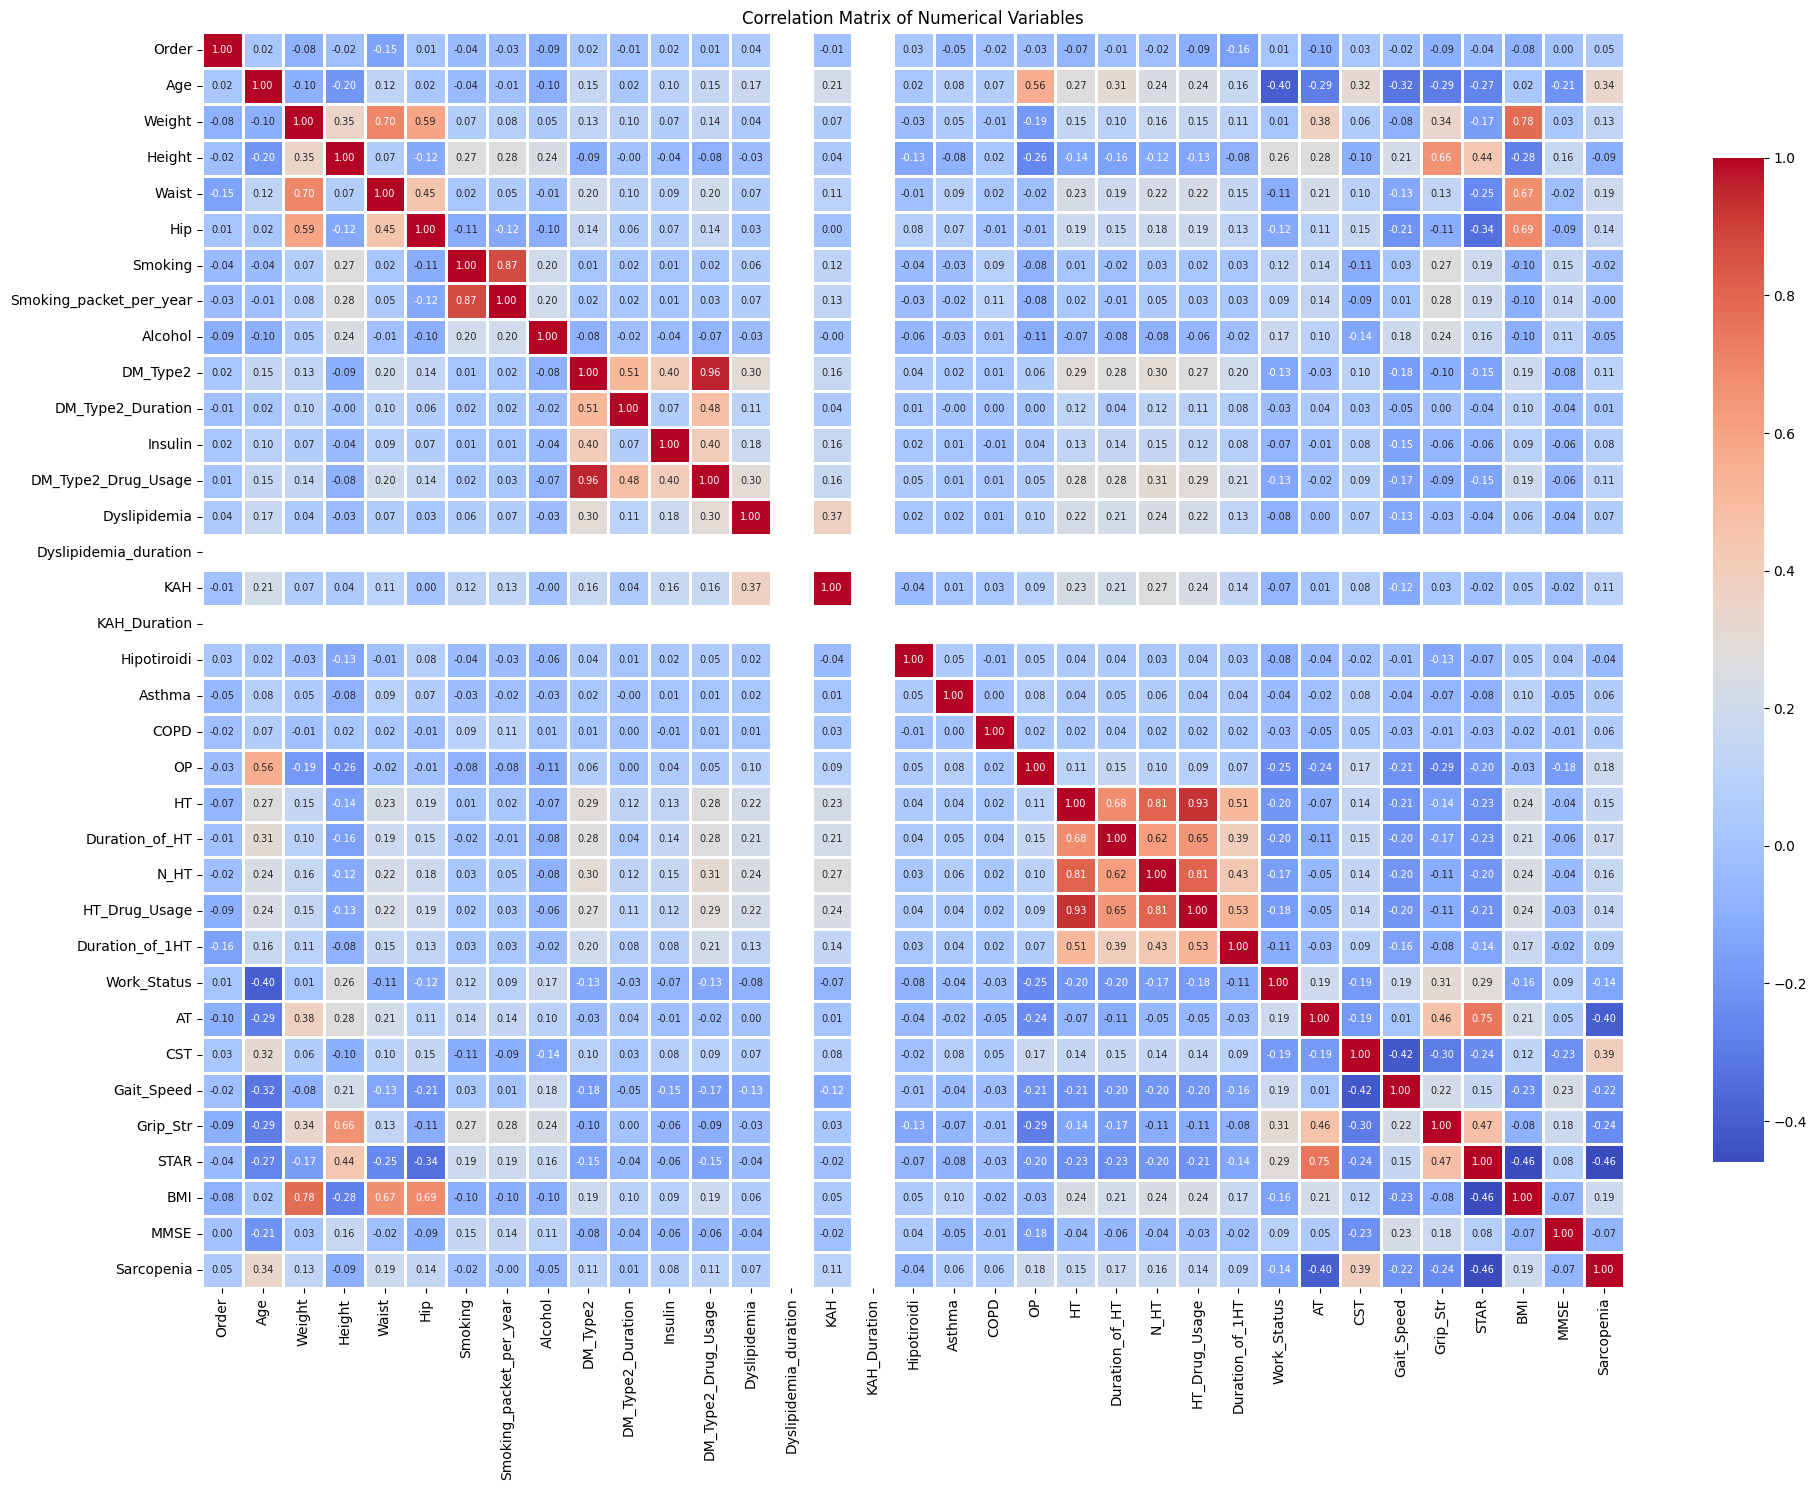

In [410]:
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr().round(2)

num_cols = len(df_numeric.columns)

fig_width = num_cols * 0.7 # Her sütun/satır için yaklaşık 0.7 inç ayırıyoruz
fig_height = num_cols * 0.7

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=1,cbar_kws={'shrink': 0.8},
    annot_kws={"fontsize": 7})
plt.title('Correlation Matrix of Numerical Variables')

plt.xticks(rotation=90, fontsize=10)  # X ekseni etiketlerini dikey yap ve font boyutunu ayarla
plt.yticks(rotation=0, fontsize=10) # Y ekseni etiketlerini yatay bırak ve font boyutunu ayarla

# Grafiklerin düzenini optimize edelim ve çakışmaları önleyelim
plt.tight_layout()
plt.show()

In [411]:
df.KAH_Duration.describe()

count    5016.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: KAH_Duration, dtype: float64

<Axes: xlabel='KAH_Duration', ylabel='Sarcopenia'>

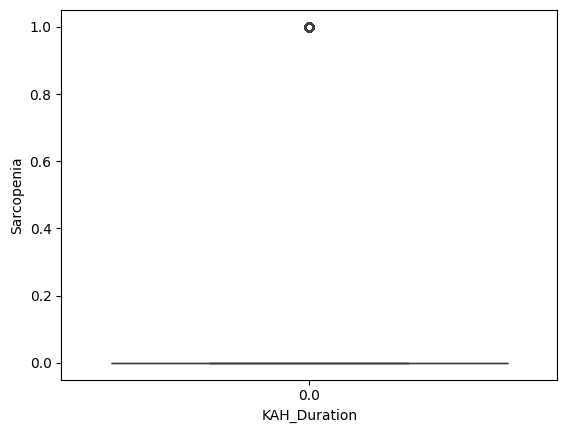

In [412]:
sns.boxplot(x='KAH_Duration', y='Sarcopenia', data=df)

In [413]:
df['KAH_Duration'].corr(df['Sarcopenia'])

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


np.float64(nan)

**Varyansı ve standart sapması 0 olan değerler arasında ilişki kurulamıyor.**

<Axes: xlabel='Dyslipidemia_duration', ylabel='Sarcopenia'>

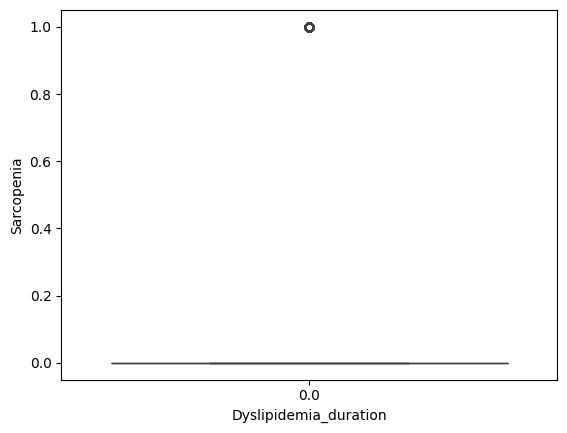

In [414]:
sns.boxplot(x='Dyslipidemia_duration', y='Sarcopenia', data=df)

# **Numerical vs. Numerical**

In [415]:
def bivariate_scatter (column1,column2):
  # Use the .name attribute to get the column names as strings
  sns.scatterplot(x=column1.name, y=column2.name, data=df, hue='Sarcopenia', palette=['skyblue', 'orange'])
  plt.title(f'{column1.name} vs {column2.name} Distribution', fontsize=16)
  plt.xlabel(f'{column1.name} Durumu', fontsize=12)
  plt.ylabel(f'{column2.name}', fontsize=12)

  # Izgara ekleyelim
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Grafiği göster
  plt.tight_layout()
  plt.show()

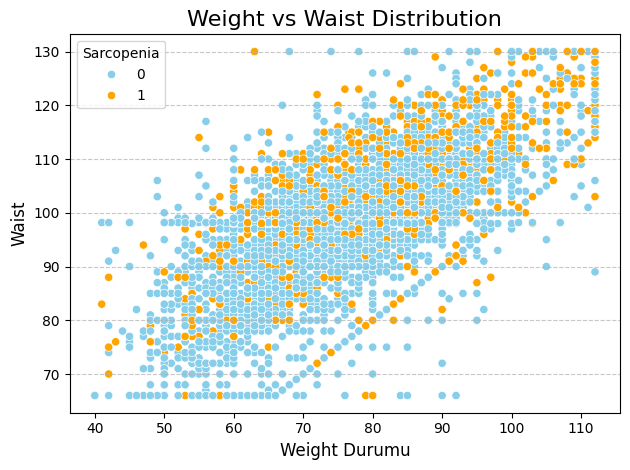

In [416]:
bivariate_scatter (df.Weight,df.Waist)

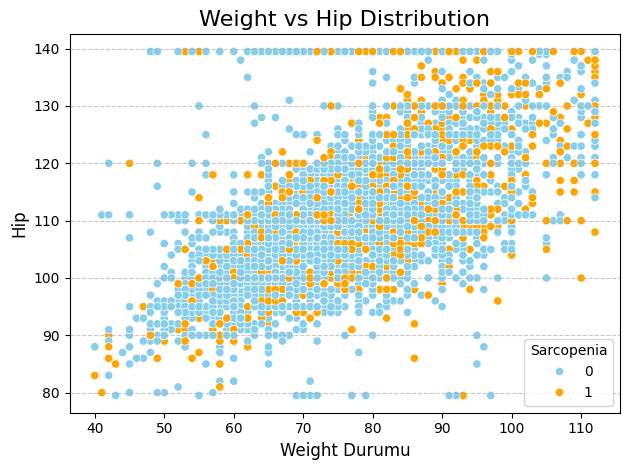

In [417]:
bivariate_scatter (df.Weight,df.Hip)

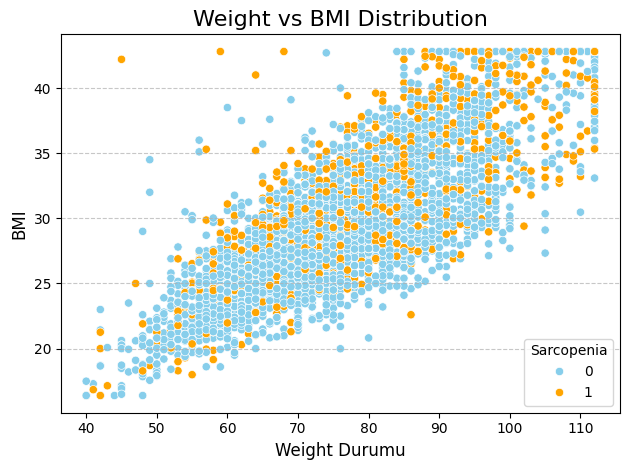

In [418]:
bivariate_scatter (df.Weight,df.BMI)

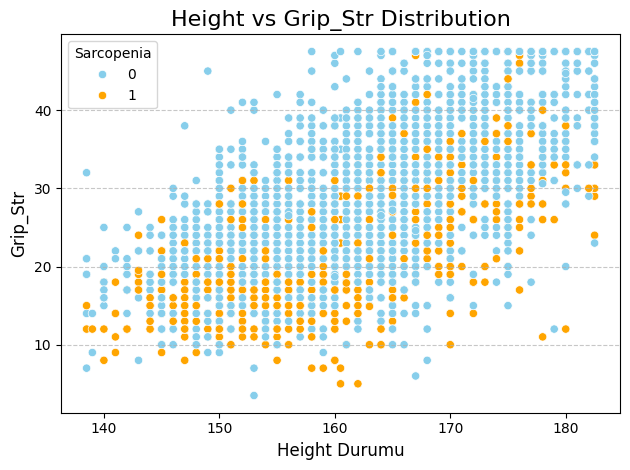

In [419]:
bivariate_scatter (df.Height,df.Grip_Str)

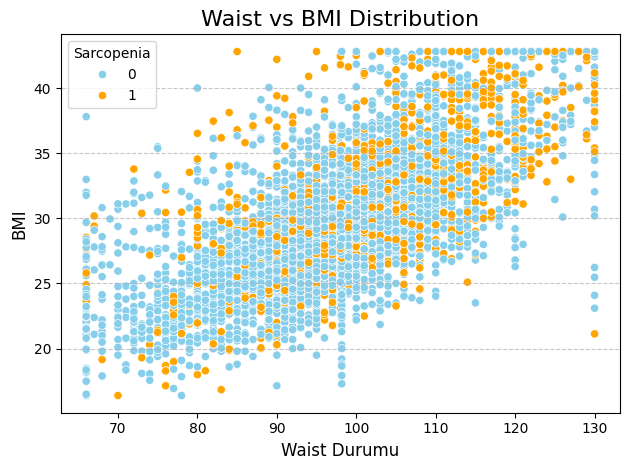

In [420]:
bivariate_scatter (df.Waist,df.BMI)

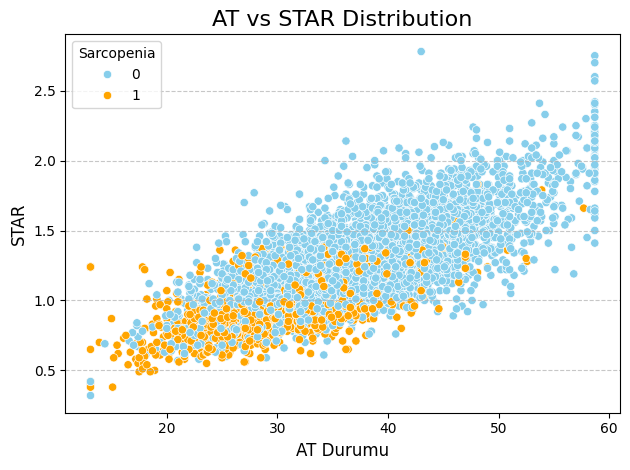

In [421]:
bivariate_scatter (df.AT,df.STAR)

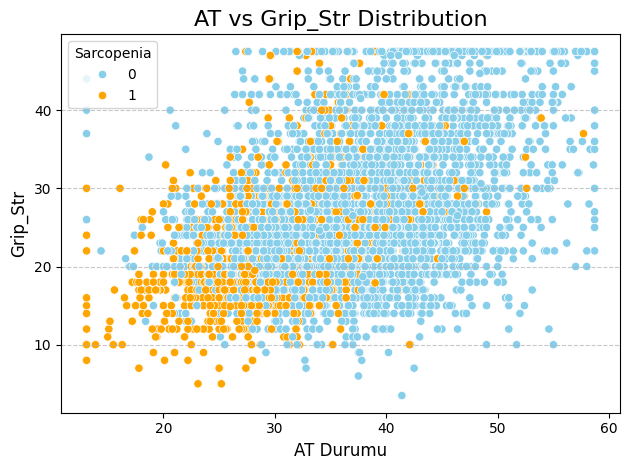

In [422]:
bivariate_scatter (df.AT,df.Grip_Str)

# **Numerical vs. Sarcopenia**

In [423]:
def bivariate (column1,column2):
  # Use the .name attribute to get the column names as strings
  sns.boxplot(x=column1.name, y=column2.name, data=df, hue='Sarcopenia', palette=['skyblue', 'orange'])
  plt.title(f'{column1.name} vs {column2.name} Distribution', fontsize=16)
  plt.xlabel(f'{column1.name} Durumu', fontsize=12)
  plt.ylabel(f'{column2.name}', fontsize=12)

  # Izgara ekleyelim
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Grafiği göster
  plt.tight_layout()
  plt.show()

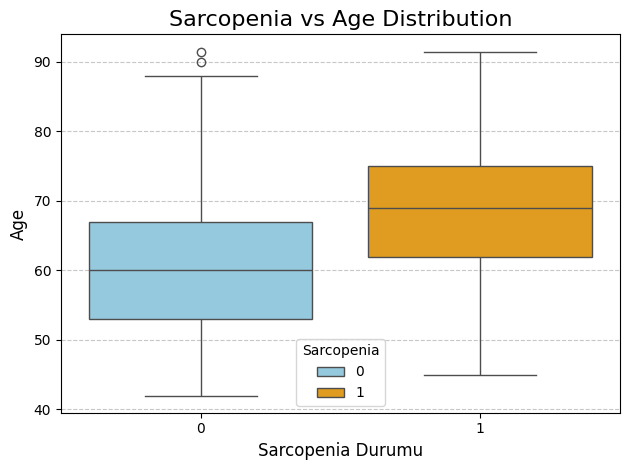

In [424]:
bivariate (df.Sarcopenia,df.Age)

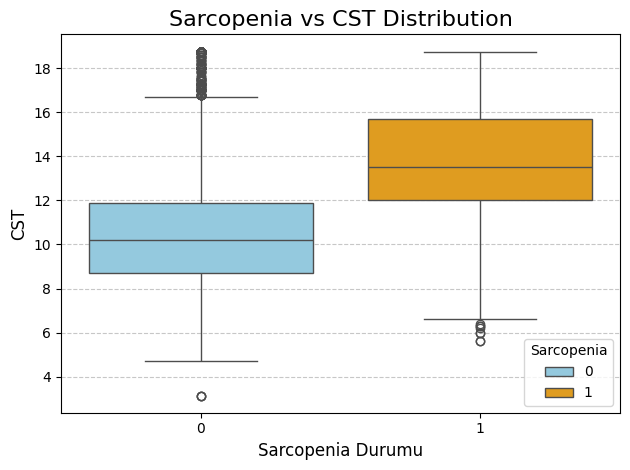

In [425]:
bivariate (df.Sarcopenia,df.CST)

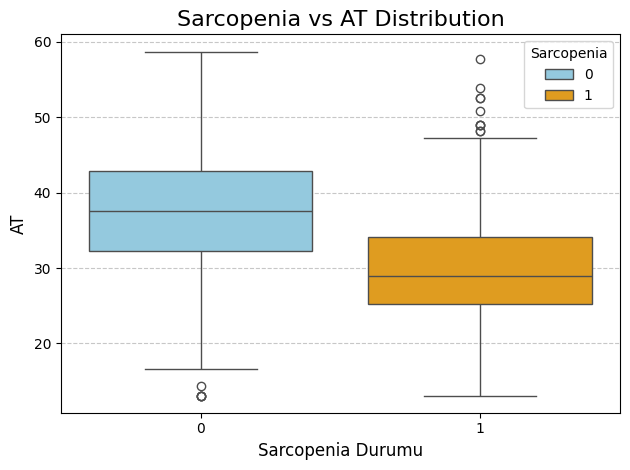

In [426]:
bivariate (df.Sarcopenia,df.AT)

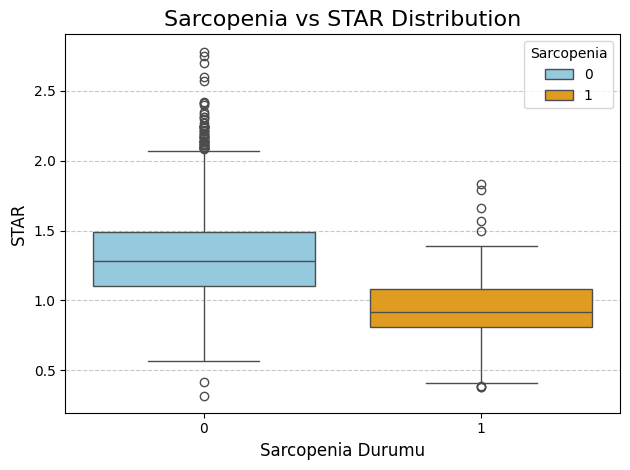

In [427]:
bivariate (df.Sarcopenia,df.STAR)

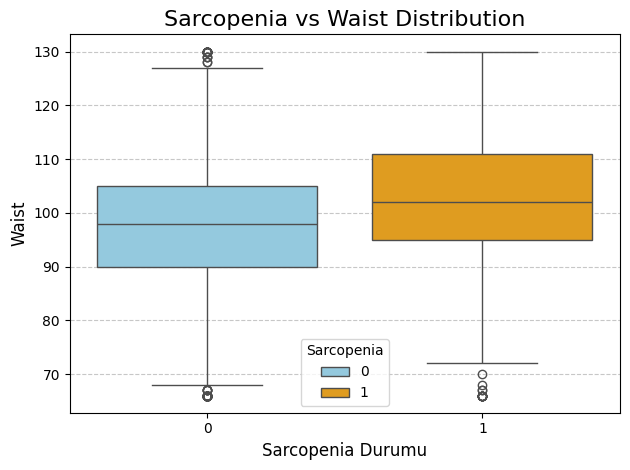

In [428]:
bivariate (df.Sarcopenia,df.Waist)

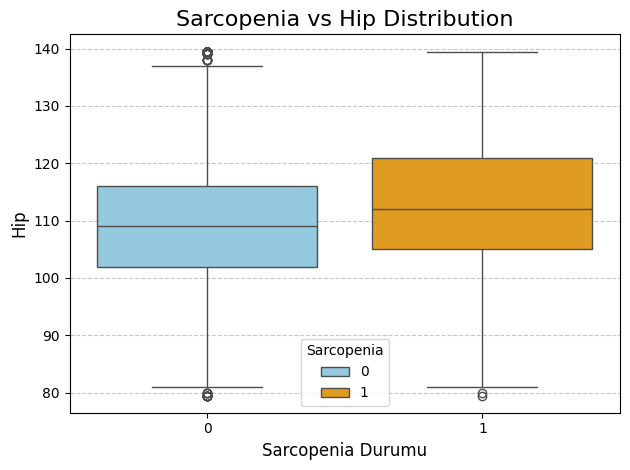

In [429]:
bivariate (df.Sarcopenia,df.Hip)

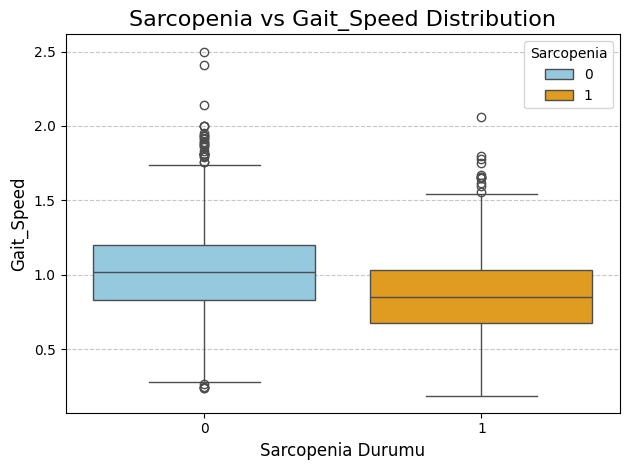

In [430]:
bivariate (df.Sarcopenia,df.Gait_Speed)

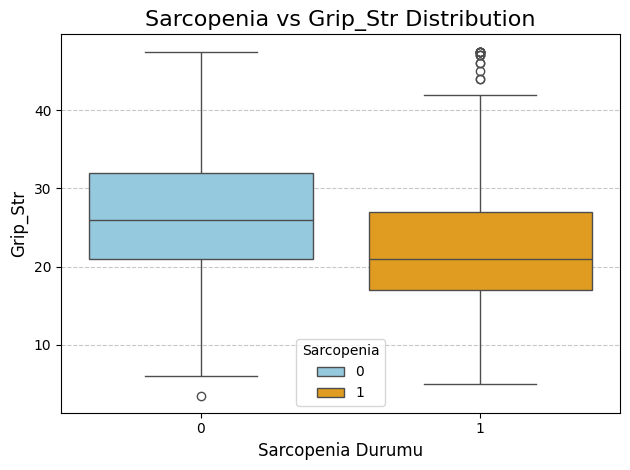

In [431]:
bivariate (df.Sarcopenia,df.Grip_Str)

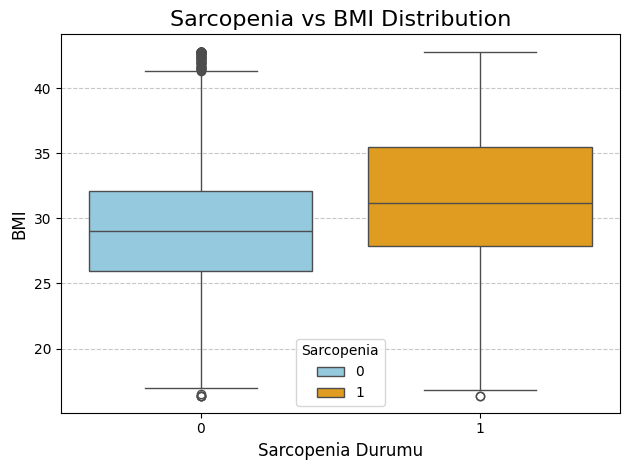

In [432]:
bivariate (df.Sarcopenia,df.BMI)

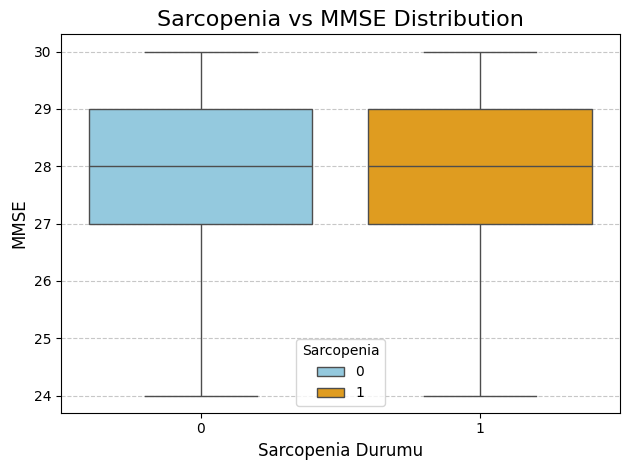

In [433]:
bivariate (df.Sarcopenia,df.MMSE)

# **Categorical vs. Sarcopenia**

<Axes: xlabel='Sarcopenia'>

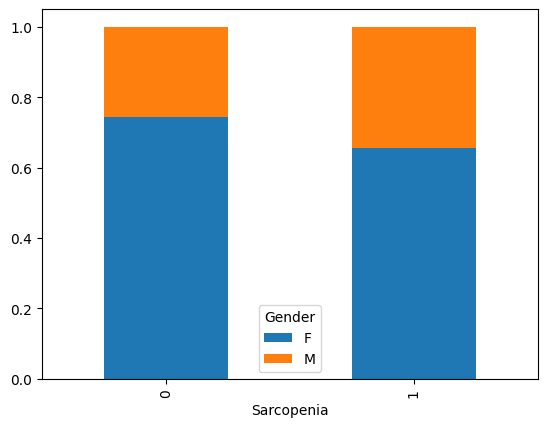

In [434]:
pd.crosstab(df['Sarcopenia'], df['Gender'], normalize='index').plot(kind='bar', stacked=True)

In [435]:
def bivariate_crosstab (column1, column2):
  # Categorical vs. Sarcopenia
  # Calculate the cross-tabulation and normalize by index (rows)
  crosstab_result = pd.crosstab(column1, column2, normalize='index')
  # Plot the result as a stacked bar chart
  crosstab_result.plot(kind='bar', stacked=True)

  # Add titles and labels for clarity
  plt.title(f'{column1.name} vs {column2.name} Distribution (Normalized by Sarcopenia Status)', fontsize=16)
  plt.xlabel(f'{column1.name} Status', fontsize=12)
  # Removed the redundant ylabel as normalize='index' implies proportion within the index categories
  plt.ylabel('Proportion within Sarcopenia Status', fontsize=12)
  plt.xticks(rotation=0) # Keep x-axis labels horizontal

  # Display the plot
  plt.show()


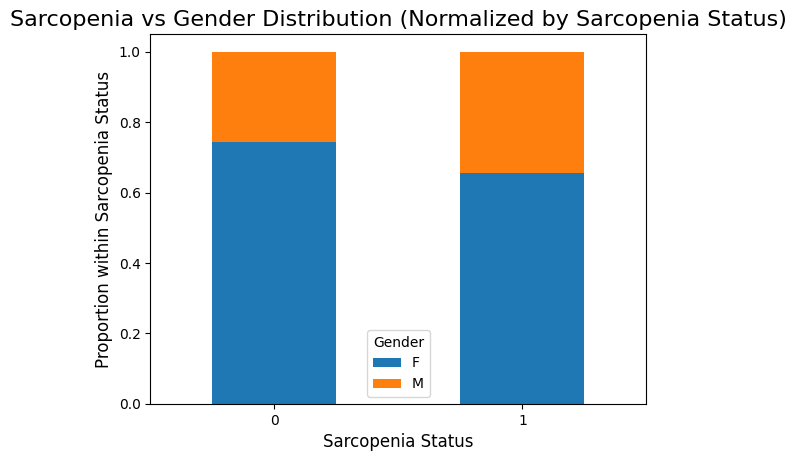

In [436]:
bivariate_crosstab (df.Sarcopenia,df.Gender)

In [437]:
def group_bar_chart(column1, column2):
  plt.figure(figsize=(8, 6))
  sns.countplot(data=df, x='Gender', hue='Sarcopenia', palette="pastel") # You can change the palette

  #Customize the plot (optional but recommended)
  plt.title('Sarcopenia by Gender', fontsize=14)
  plt.xlabel('Gender', fontsize=12)
  plt.ylabel('count', fontsize=12)
  plt.legend(title='Sarcopenia', labels=['0', '1']) # Assuming 0 and 1 represent absence/presence

  #Show the plot
  plt.tight_layout()
  plt.show()

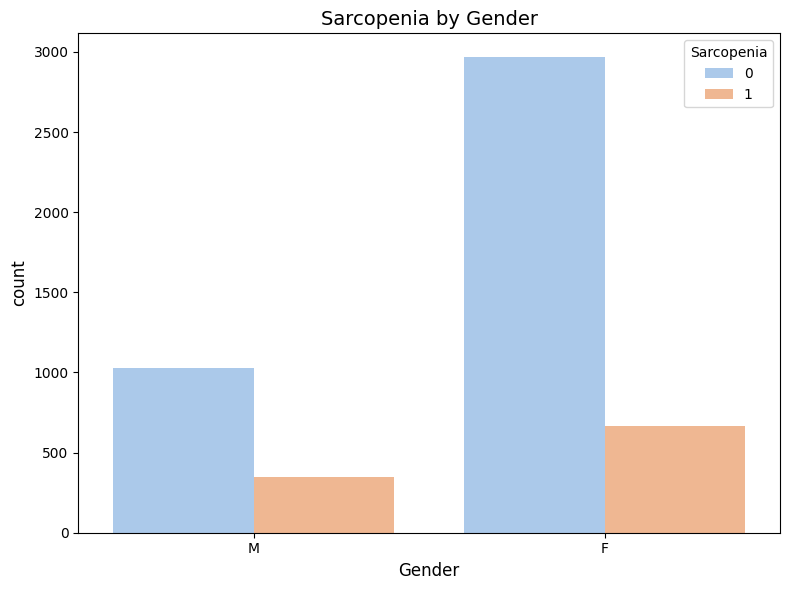

In [438]:
group_bar_chart(df.Gender,df.Sarcopenia)

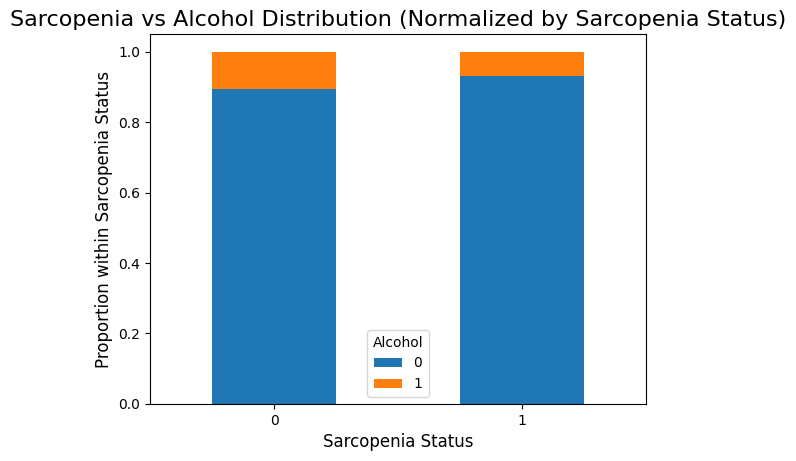

In [439]:
bivariate_crosstab (df.Sarcopenia,df.Alcohol)

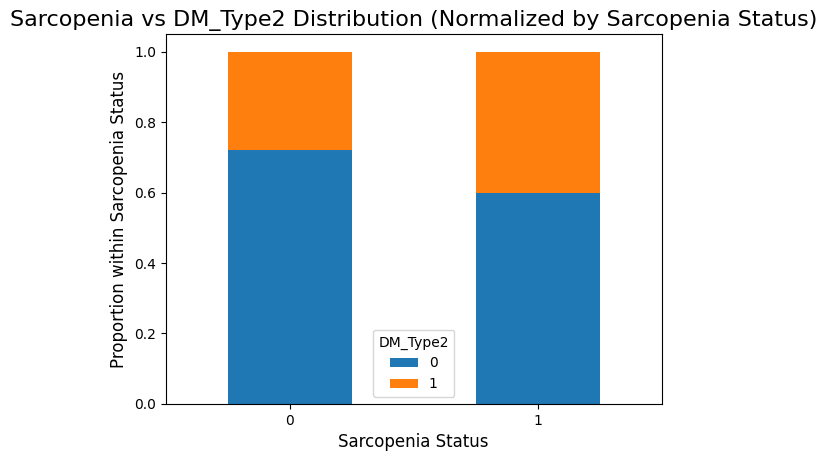

In [440]:
bivariate_crosstab(df.Sarcopenia,df.DM_Type2)

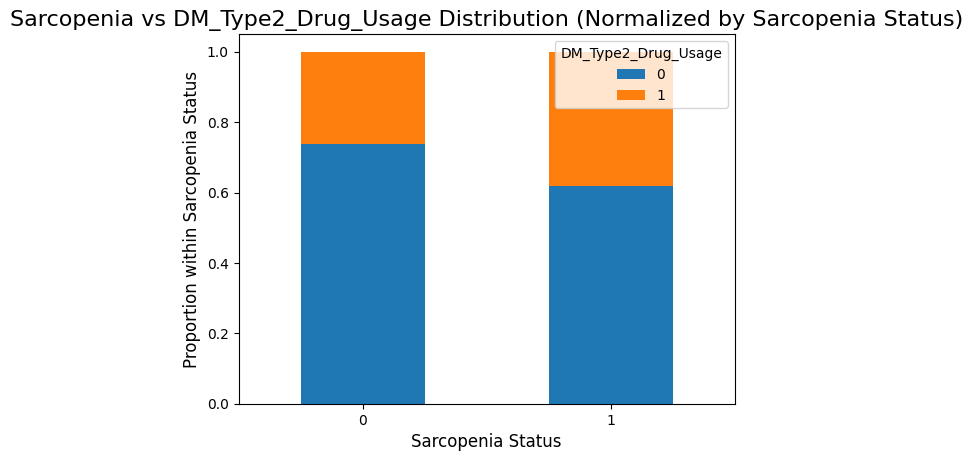

In [441]:
bivariate_crosstab(df.Sarcopenia,df.DM_Type2_Drug_Usage)

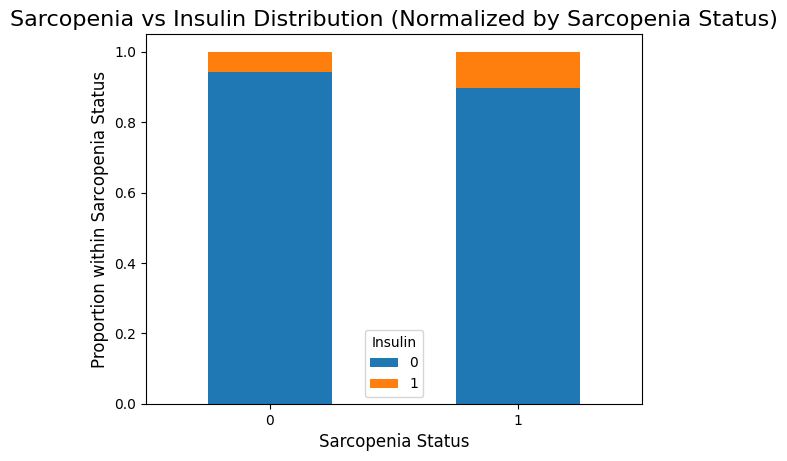

In [442]:
bivariate_crosstab(df.Sarcopenia,df.Insulin)

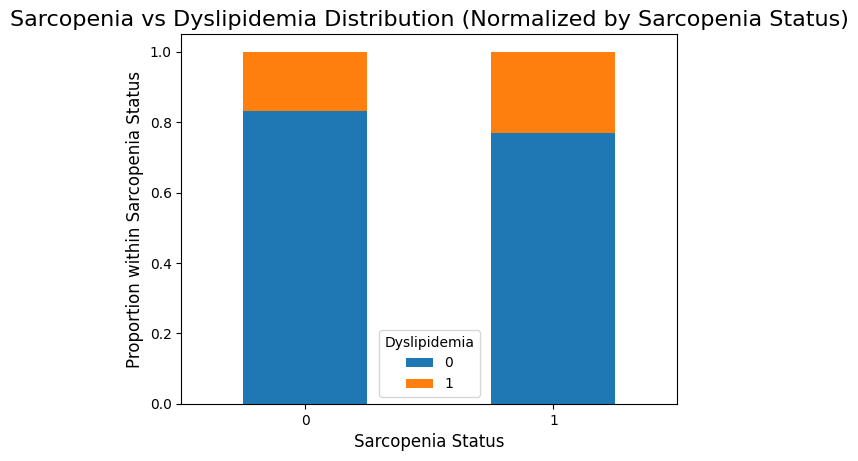

In [443]:
bivariate_crosstab(df.Sarcopenia,df.Dyslipidemia)

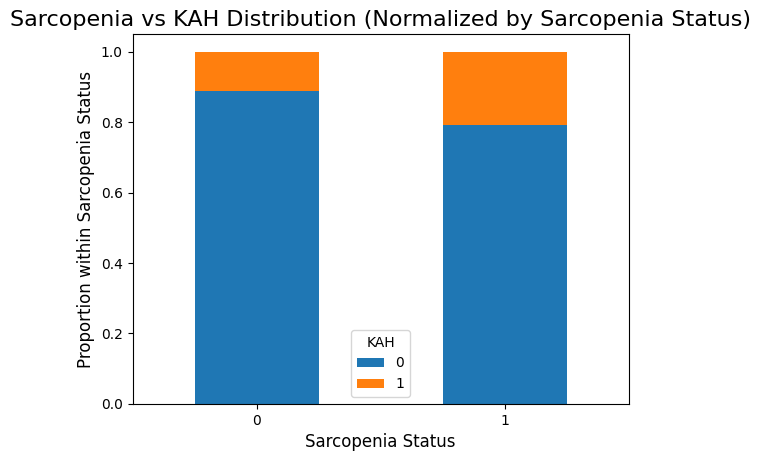

In [444]:
bivariate_crosstab(df.Sarcopenia,df.KAH)

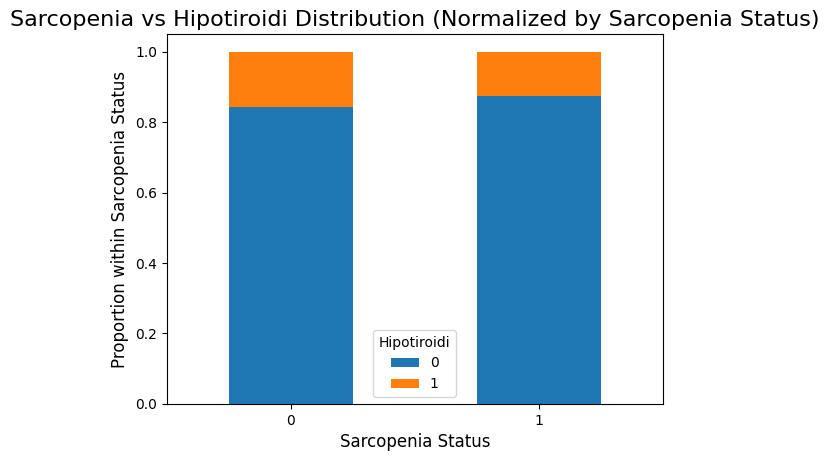

In [445]:
bivariate_crosstab  (df.Sarcopenia,df.Hipotiroidi)

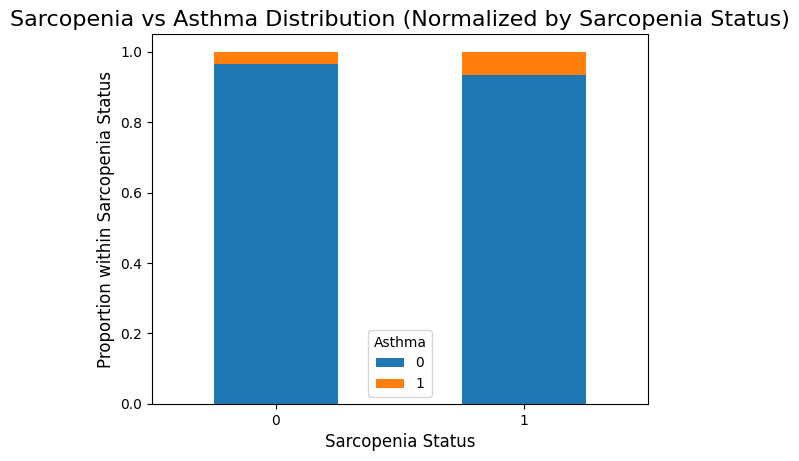

In [446]:
bivariate_crosstab(df.Sarcopenia,df.Asthma)

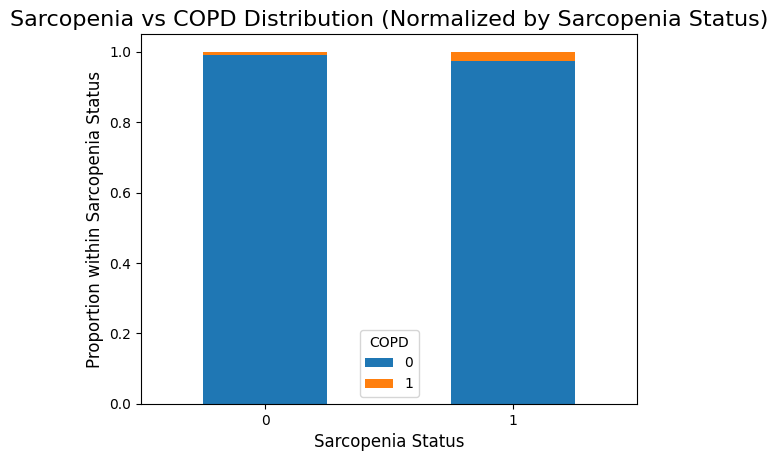

In [447]:
bivariate_crosstab  (df.Sarcopenia,df.COPD)

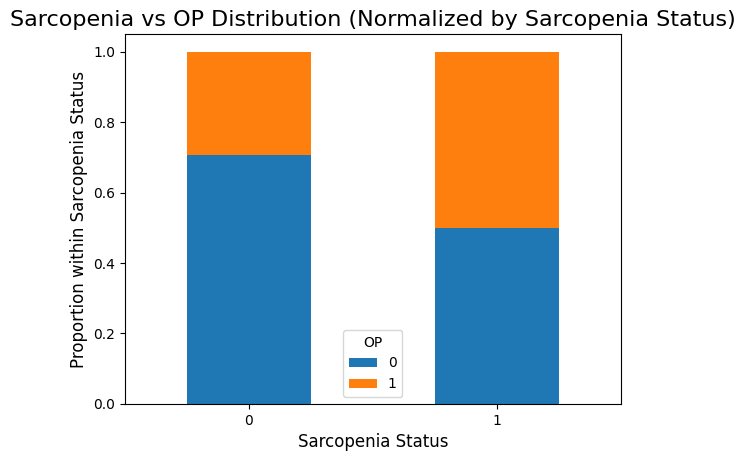

In [448]:
bivariate_crosstab  (df.Sarcopenia,df.OP)

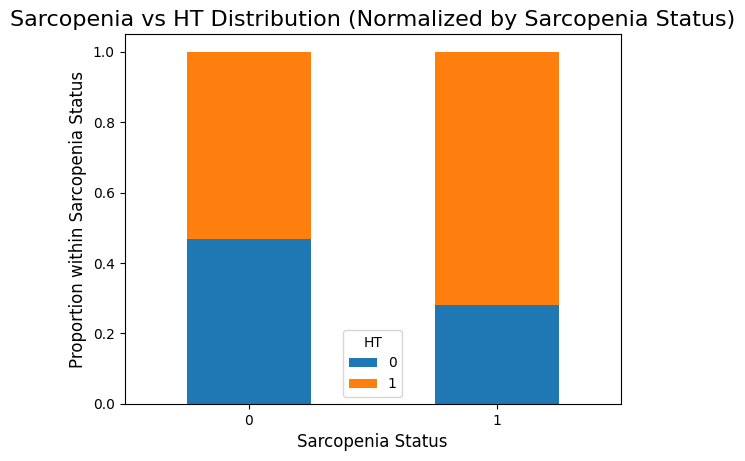

In [449]:
bivariate_crosstab  (df.Sarcopenia,df.HT)

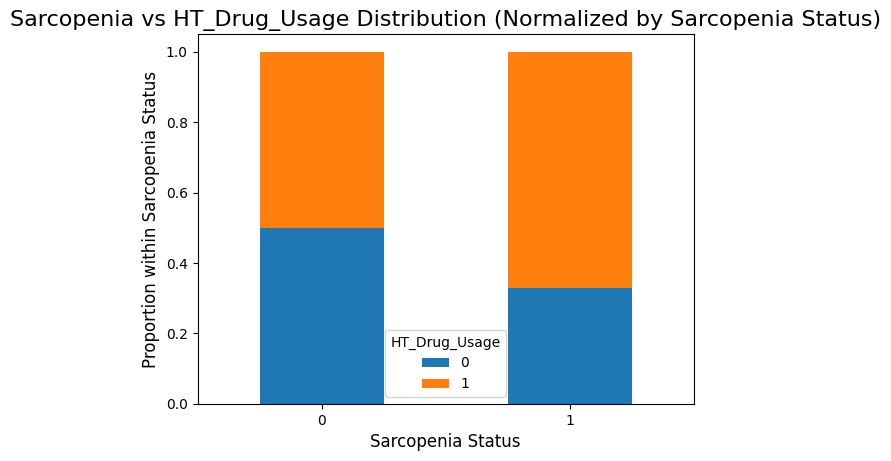

In [450]:
bivariate_crosstab  (df.Sarcopenia,df.HT_Drug_Usage)

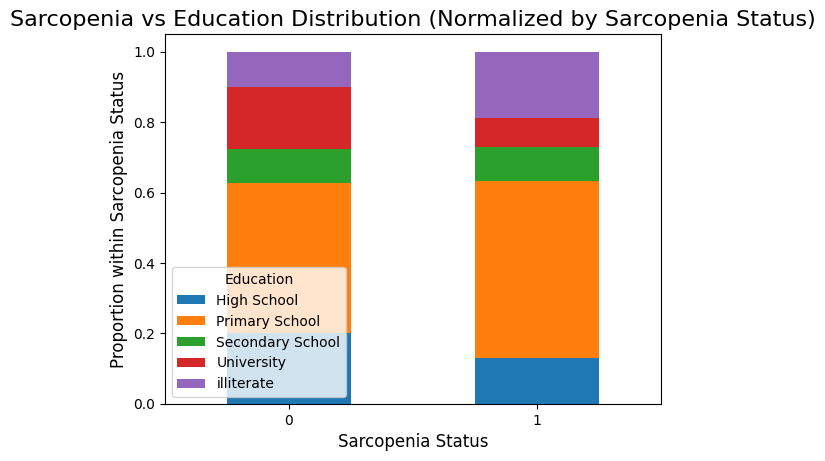

In [451]:
bivariate_crosstab  (df.Sarcopenia,df.Education)

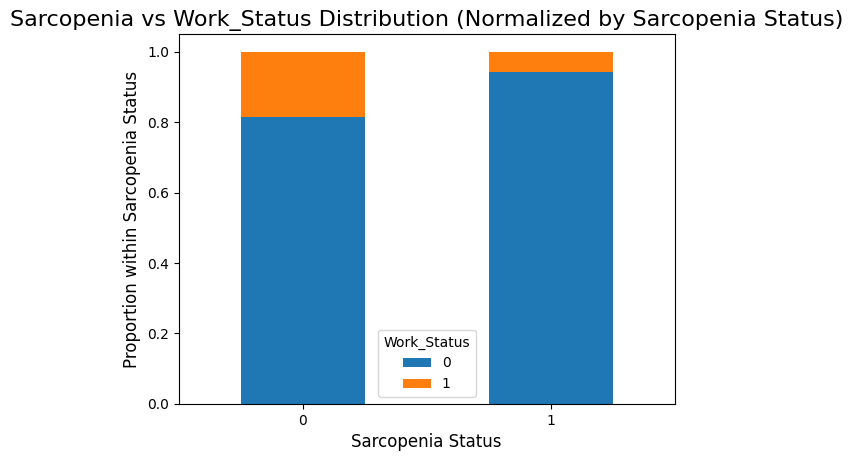

In [452]:
bivariate_crosstab  (df.Sarcopenia,df.Work_Status)

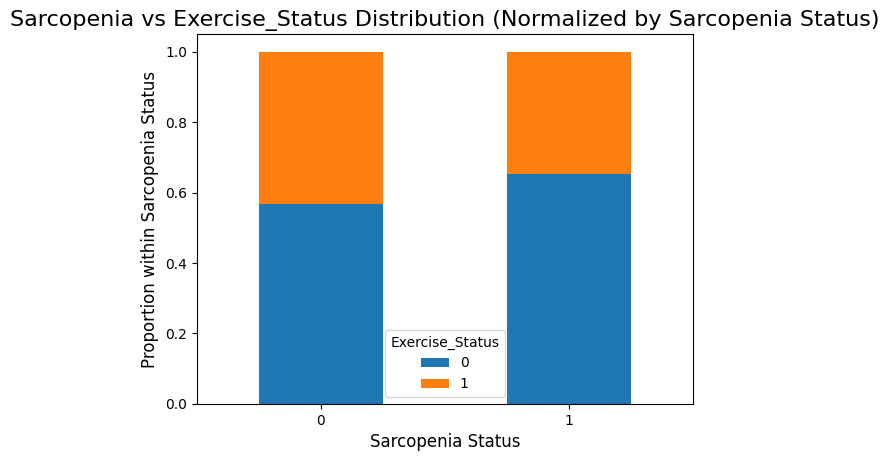

In [453]:
bivariate_crosstab  (df.Sarcopenia,df.Exercise_Status)